In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [6]:
# Filter out warnings
import warnings
warnings.filterwarnings('ignore')
print(np.log(0))

-inf


In [7]:
# Import data
df=pd.read_csv('/content/training_set.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#Remove Unnecessary Columns
df.drop(labels=['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [10]:
# Replace incorrect values
df.loc[df['Alley']=='Nan','Alley']='No'

In [11]:
# Null Value Treatment
for i in df.columns:
        if df[i].dtypes=='object':
            df[i]=df[i].fillna(df[i].mode().shape[0])
        else:
            df[i]=df[i].fillna(df[i].mean())

<Axes: >

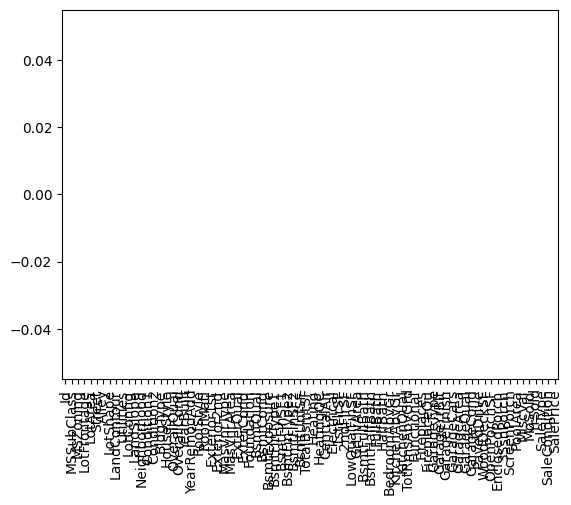

In [12]:
df.isnull().sum().plot(kind='bar')

In [13]:
# Separate X and Y
X=df.drop(labels=['SalePrice'],axis=1)
Y=df[['SalePrice']]

In [14]:
# Separte cat and con from X
cat=[]
con=[]
for i in X.columns:
  if X[i].dtypes=='object':
    cat.append(i)
  else:
    con.append(i)

In [15]:
Xcat=X[cat]
Xcon=X[con]

In [16]:
X=Xcon.join(Xcat)
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Gd,Typ,1,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,Gd,Typ,1,Attchd,Unf,TA,TA,Y,WD,Normal


In [17]:
# Preprocessing Data
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()

In [18]:
# Feature Encoding
for i in Xcat.columns:
    Xcat[i]=Xcat[i].astype(str)
    Xcat[i]=le.fit_transform(Xcat[i])

In [19]:
# Feature Scaling
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=Xcon.columns)

In [20]:
X=Xcon.join(Xcat)
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,2,6,0,2,2,5,5,2,8,4
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,3,6,5,2,2,5,5,2,8,4
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,2,6,5,2,2,5,5,2,8,4
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,2,6,3,6,3,5,5,2,8,0
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,2,6,5,2,2,5,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,3,6,5,2,2,5,5,2,8,4
1456,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,3,2,5,2,3,5,5,2,8,4
1457,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,2,6,3,2,2,5,5,2,8,4
1458,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,2,6,0,2,3,5,5,2,8,4


In [21]:
# Remove outliers and reset the index
out=[]
for i in Xcon.columns:
    o1=Xcon[(Xcon[i]<-3)|(Xcon[i]>3)].index
    out.extend(o1)
out

[9,
 48,
 93,
 125,
 165,
 246,
 291,
 300,
 312,
 335,
 411,
 488,
 520,
 535,
 635,
 637,
 703,
 705,
 713,
 861,
 969,
 985,
 1030,
 1062,
 1144,
 1186,
 1190,
 1266,
 1393,
 1416,
 171,
 197,
 231,
 277,
 313,
 446,
 807,
 909,
 934,
 1107,
 1127,
 1173,
 1182,
 1211,
 1298,
 1337,
 53,
 249,
 313,
 335,
 384,
 451,
 457,
 661,
 706,
 769,
 848,
 1298,
 1396,
 375,
 533,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 583,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 304,
 630,
 747,
 1132,
 1137,
 1349,
 37,
 58,
 70,
 105,
 115,
 161,
 169,
 178,
 224,
 297,
 349,
 403,
 477,
 517,
 523,
 654,
 691,
 718,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1111,
 1169,
 1228,
 1289,
 1298,
 1373,
 1417,
 70,
 178,
 523,
 898,
 1182,
 1298,
 24,
 52,
 113,
 116,
 153,
 166,
 233,
 253,
 260,
 263,
 271,
 273,
 313,
 322,
 355,
 414,
 440,
 446,
 470,
 493,
 542,
 548,
 577,
 586,
 599,
 666,
 697,
 764,
 785,
 82

In [22]:
outliers=list(set(out))
print(outliers)

[1, 3, 5, 7, 8, 9, 17, 24, 26, 28, 33, 37, 39, 41, 46, 48, 50, 51, 52, 53, 55, 58, 64, 70, 72, 74, 78, 80, 88, 93, 102, 104, 105, 113, 115, 116, 118, 120, 125, 129, 137, 144, 153, 154, 159, 161, 165, 166, 169, 170, 171, 176, 178, 182, 185, 187, 188, 189, 191, 196, 197, 198, 201, 205, 213, 215, 218, 224, 231, 233, 237, 241, 245, 246, 249, 250, 251, 253, 258, 260, 263, 267, 271, 273, 277, 278, 280, 289, 291, 293, 297, 298, 299, 300, 304, 306, 309, 312, 313, 314, 322, 325, 326, 328, 330, 332, 335, 339, 342, 343, 346, 349, 351, 352, 355, 357, 358, 359, 360, 365, 366, 367, 375, 378, 380, 384, 398, 400, 403, 406, 411, 414, 420, 421, 426, 440, 441, 446, 451, 454, 457, 459, 461, 462, 470, 471, 475, 477, 480, 488, 493, 495, 496, 499, 504, 505, 508, 510, 517, 519, 520, 523, 529, 533, 535, 539, 542, 546, 548, 550, 558, 570, 574, 576, 577, 580, 581, 583, 586, 588, 589, 591, 597, 599, 605, 608, 611, 618, 624, 625, 628, 630, 633, 634, 635, 637, 642, 645, 647, 648, 653, 654, 658, 660, 661, 662, 664, 

In [23]:
X=X.drop(index=out,axis=0)
Y=Y.drop(index=out,axis=0)

In [24]:
X.index=range(0,X.shape[0])
Y.index=range(0,Y.shape[0])

In [25]:
X.shape

(1021, 77)

In [26]:
Y.shape

(1021, 1)

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [28]:
from statsmodels.api import add_constant,OLS
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     109.3
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:17:38   Log-Likelihood:                -9245.6
No. Observations:                 816   AIC:                         1.864e+04
Df Residuals:                     744   BIC:                         1.897e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id              -88.9097    767.232     -0.116      0.908   -1595.107    1417.287
MSSubClass    -4006.3799   3005.092     -1.333      0.183   -9905.849    1893.089
LotFrontage     988.4666   1320.446      0.749      0.454   -1603.778    3580.711
LotArea        7562.3445   3079.902      2.455      0.014    1516.011    1.36e+04
OverallQual    1.172e+04   1574.355      7.444      0.000    8629.391    1.48e+04
OverallCond    5954.7430   1188.185      5.012      0.000    3622.148    8287.338
YearBuilt      7818.9374   2533.835      3.086      0.002    2844.621    1.28e+04
YearRemodAdd    547.0506   1363.468      0.401      0.688   -2129.651    3223.752
MasVnrArea     -110.2422   1609.957     -0.068      0.945   -3270.842    3050.358
BsmtFinSF1     9606.5185   1259.701      7.626      0.000    7133.528    1.21e+04
BsmtFinSF2     4228.2707   2135.852      1.980      0.048      35.256    8421.286
BsmtUnfSF       932.8119   1135.060      0.822      0.411   -1295.489    3161.113
TotalBsmtSF    1.248e+04   1759.012      7.096      0.000    9028.498    1.59e+04
1stFlrSF       6340.8361   1809.174      3.505      0.000    2789.143    9892.529
2ndFlrSF       1.274e+04   1405.362      9.063      0.000    9977.222    1.55e+04
LowQualFinSF  -1067.3891   7557.004     -0.141      0.888   -1.59e+04    1.38e+04
GrLivArea      1.515e+04   1493.829     10.139      0.000    1.22e+04    1.81e+04
BsmtFullBath   1033.2063   1223.084      0.845      0.399   -1367.901    3434.314
BsmtHalfBath  -2.398e+05   1.01e+05     -2.380      0.018   -4.38e+05    -4.2e+04
FullBath       -772.2671   1511.191     -0.511      0.609   -3738.974    2194.440
HalfBath       -856.5496   1292.417     -0.663      0.508   -3393.769    1680.670
BedroomAbvGr  -3893.6974   1446.042     -2.693      0.007   -6732.506   -1054.888
KitchenAbvGr  -2.103e+05   8.84e+04     -2.380      0.018   -3.84e+05   -3.68e+04
TotRmsAbvGrd   4977.4774   1817.704      2.738      0.006    1409.037    8545.918
Fireplaces     3869.9491   1742.314      2.221      0.027     449.512    7290.387
GarageYrBlt   -2356.1963   1675.817     -1.406      0.160   -5646.090     933.697
GarageCars     -254.9457   2051.151     -0.124      0.901   -4281.678    3771.787
GarageArea     5593.0795   1976.958      2.829      0.005    1712.000    9474.159
WoodDeckSF     2089.1472    976.611      2.139      0.033     171.905    4006.389
OpenPorchSF    1621.9697   1098.180      1.477      0.140    -533.931    3777.871
EnclosedPorch  -166.0619   1245.884     -0.133      0.894   -2611.928    2279.804
3SsnPorch      -1.85e+04   2.79e+04     -0.663      0.508   -7.33e+04    3.63e+04
ScreenPorch     932.8333   1569.485      0.594      0.552   -2148.313    4013.979
PoolArea      -6.833e+04   2.87e+04     -2.380      0.018   -1.25e+05    -1.2e+04
MiscVal       -1758.1669   3934.174     -0.447   

In [29]:
model.pvalues.sort_values()

,0
GrLivArea,1.022280e-22
2ndFlrSF,1.109964e-18
BsmtFinSF1,7.403761e-14
OverallQual,2.698605e-13
BsmtQual,6.264242e-13
...,...
GarageCars,9.011161e-01
Id,9.077760e-01
Condition1,9.359366e-01
MasVnrArea,9.454257e-01


In [30]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop MasVnrArea
0.904


In [31]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Condition1
0.904


In [32]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Id
0.905


In [33]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop GarageCars
0.905


In [34]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop EnclosedPorch
0.905


In [35]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Electrical
0.905


In [36]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop LowQualFinSF
0.905


In [37]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop GrLivArea
0.905


In [38]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop GarageFinish
0.905


In [39]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop GarageCond
0.905


In [40]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop HouseStyle
0.905


In [41]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop BsmtCond
0.906


In [42]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Heating
0.906


In [43]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop YearRemodAdd
0.906


In [44]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop BldgType
0.906


In [45]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop RoofStyle
0.906


In [46]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop MiscVal
0.906


In [47]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop LotShape
0.906


In [48]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop FullBath
0.906


In [49]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop HalfBath
0.906


In [50]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop PavedDrive
0.906


In [51]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop BsmtFinType1
0.906


In [52]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop LotConfig
0.907


In [53]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop ScreenPorch
0.907


In [54]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop LotFrontage
0.907


In [55]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop 3SsnPorch
0.907


In [56]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop BsmtFullBath
0.907


In [57]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop RoofMatl
0.907


In [58]:
c=model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop MSZoning
0.907


In [59]:
c =model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Exterior2nd
0.907


In [60]:
c =model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop BsmtUnfSF
0.907


In [61]:
c =model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop MasVnrType
0.907


In [62]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Exterior1st
0.907


In [63]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop MoSold
0.907


In [64]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Condition2
0.907


In [65]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop LandContour
0.907


In [66]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop ExterCond
0.907


In [67]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop GarageType
0.907


In [68]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Alley
0.907


In [69]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop Foundation
0.907


In [70]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop YrSold
0.907


In [71]:
c = model.pvalues.sort_values().index[-1] # last column

X=X.drop(labels=c,axis=1) # drop that column

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score=round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1] # new column name to drop

print('next column to drop',c)
print(score)

next column to drop FireplaceQu
0.906


In [72]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'Street', 'Utilities', 'LandSlope', 'Neighborhood',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1021 non-null   float64
 1   LotArea        1021 non-null   float64
 2   OverallQual    1021 non-null   float64
 3   OverallCond    1021 non-null   float64
 4   YearBuilt      1021 non-null   float64
 5   BsmtFinSF1     1021 non-null   float64
 6   BsmtFinSF2     1021 non-null   float64
 7   TotalBsmtSF    1021 non-null   float64
 8   1stFlrSF       1021 non-null   float64
 9   2ndFlrSF       1021 non-null   float64
 10  BsmtHalfBath   1021 non-null   float64
 11  BedroomAbvGr   1021 non-null   float64
 12  KitchenAbvGr   1021 non-null   float64
 13  TotRmsAbvGrd   1021 non-null   float64
 14  Fireplaces     1021 non-null   float64
 15  GarageYrBlt    1021 non-null   float64
 16  GarageArea     1021 non-null   float64
 17  WoodDeckSF     1021 non-null   float64
 18  OpenPorc

In [74]:
# Finding relations of SalePrice with every column grapically
import seaborn as sns
import matplotlib.pyplot as plt

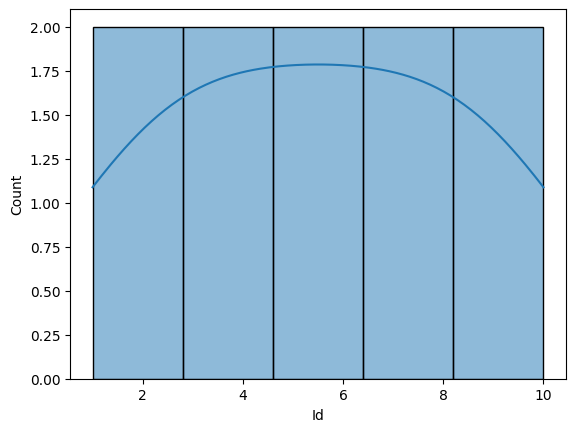

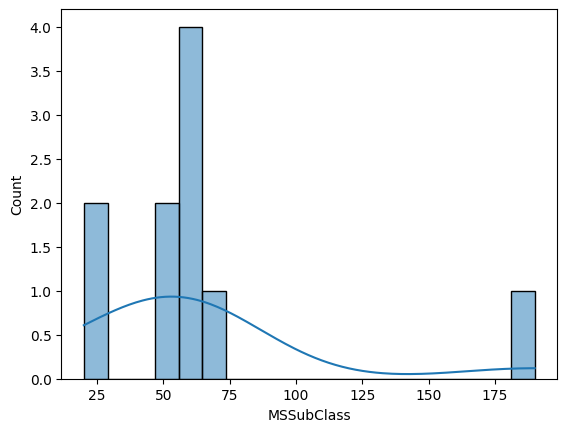

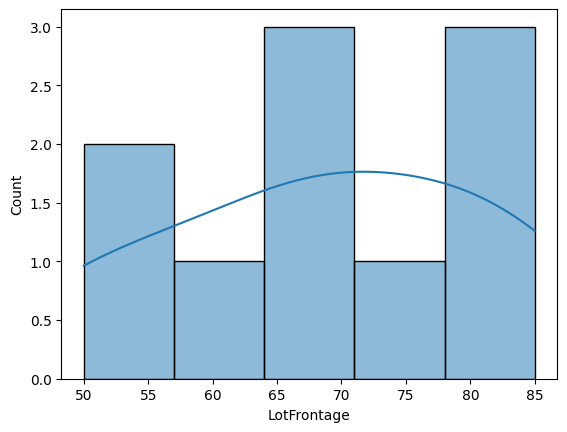

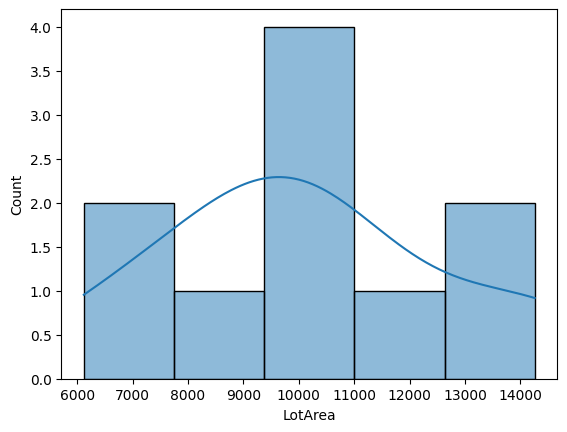

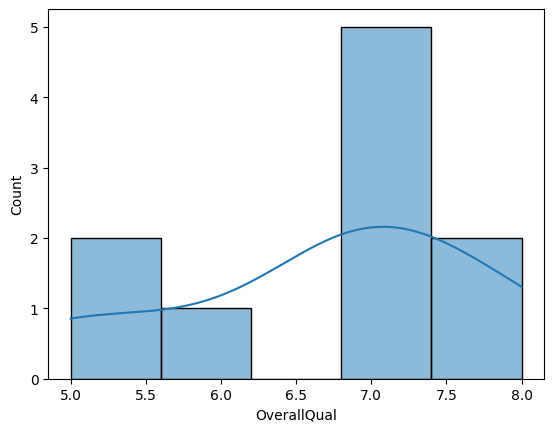

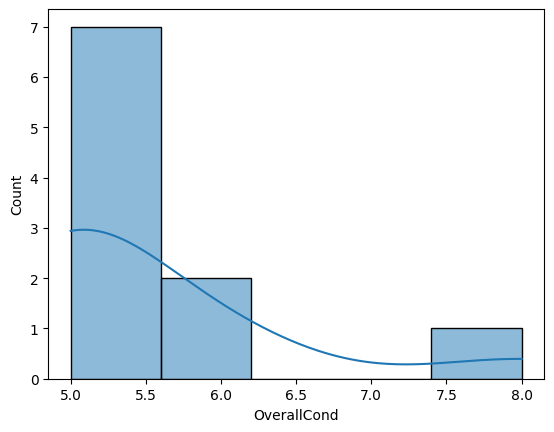

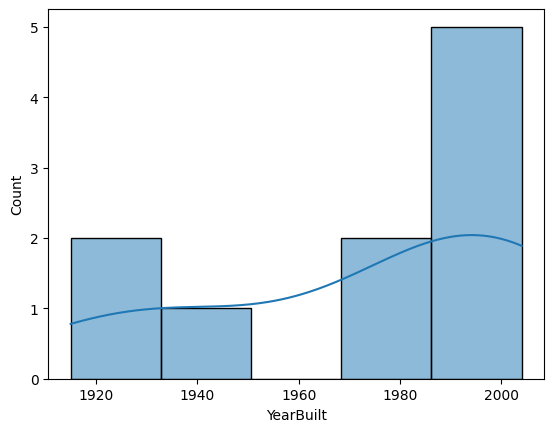

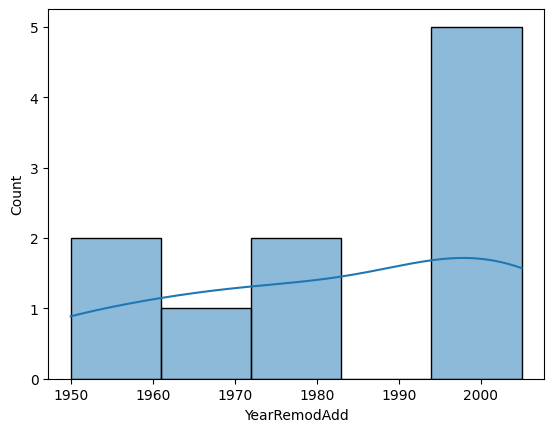

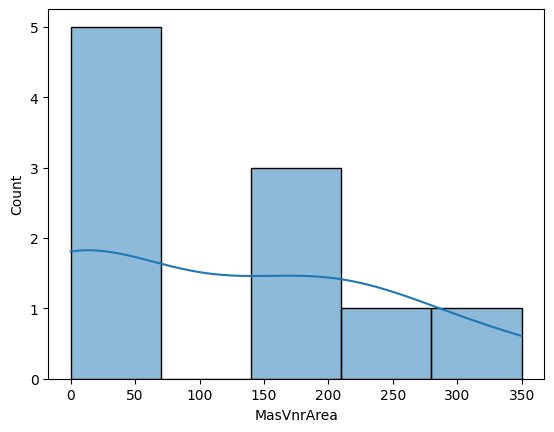

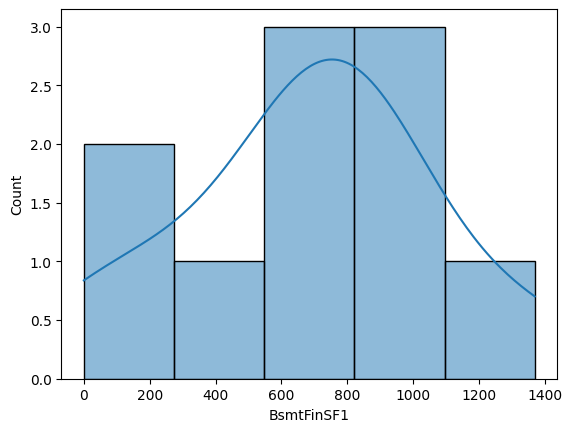

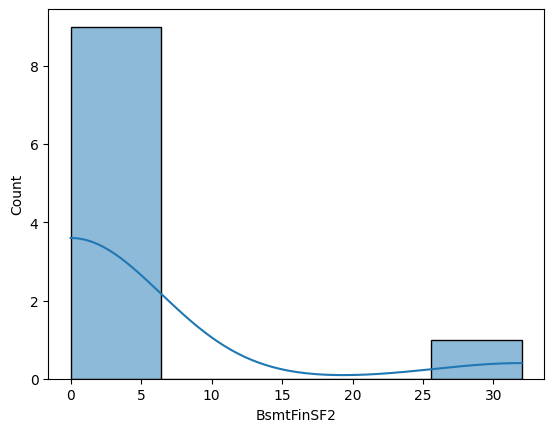

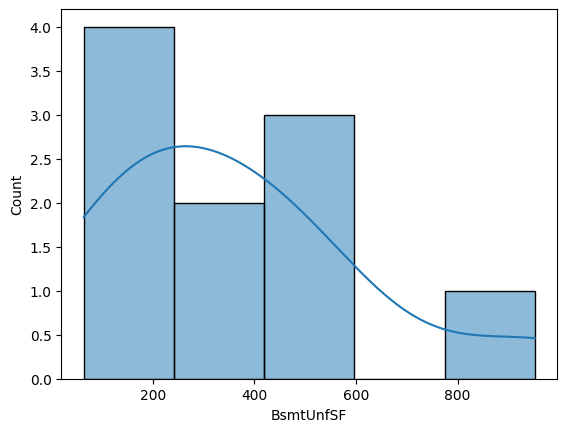

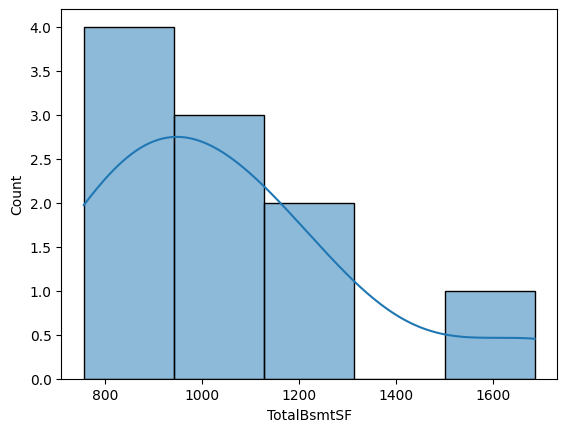

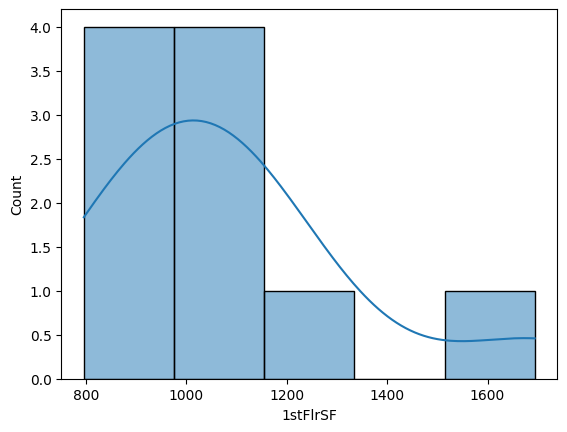

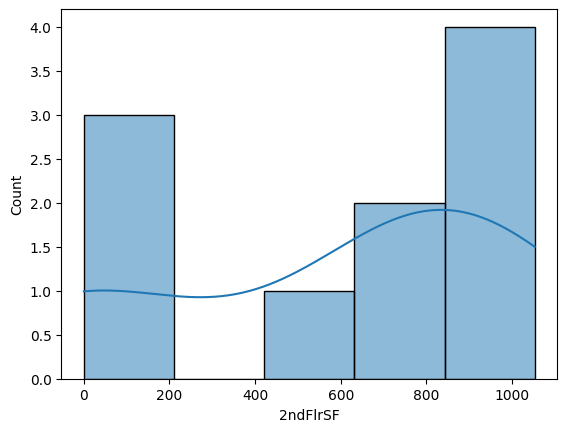

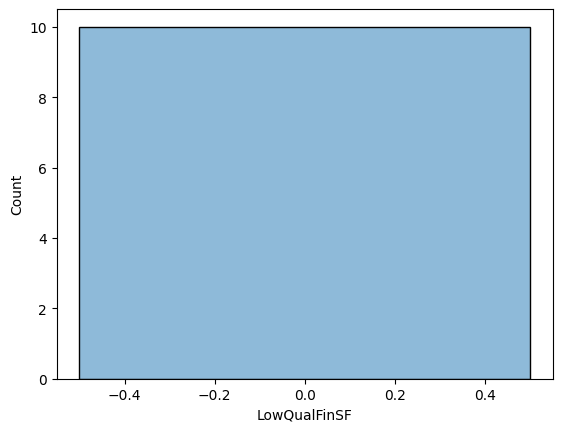

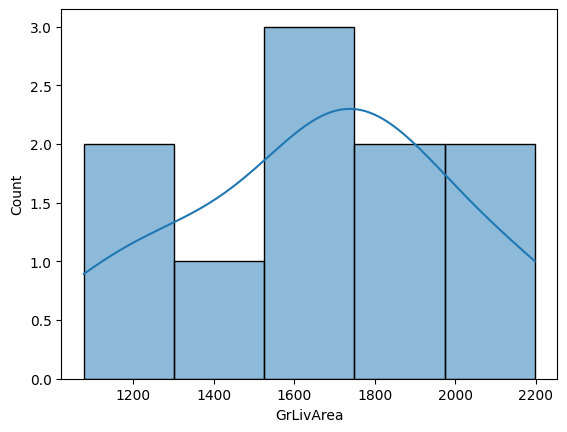

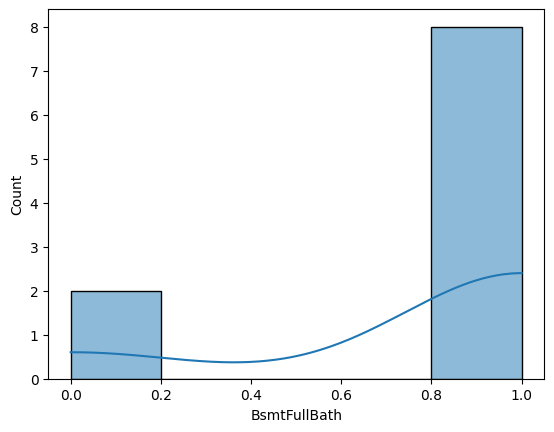

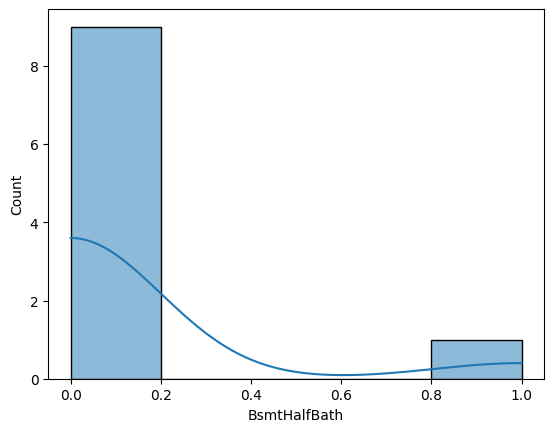

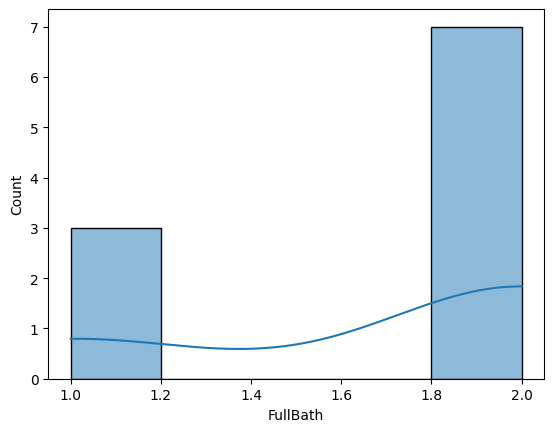

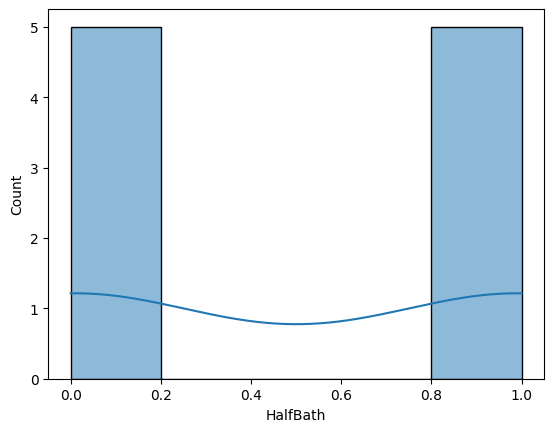

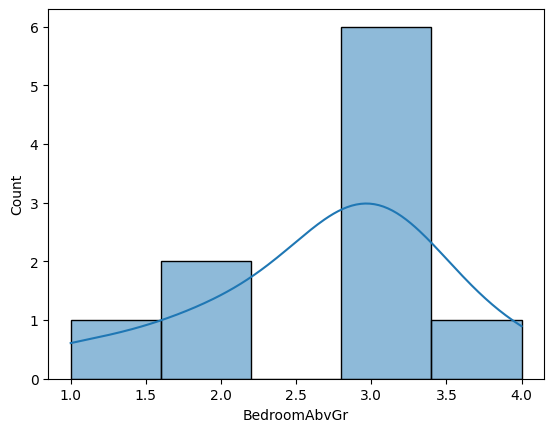

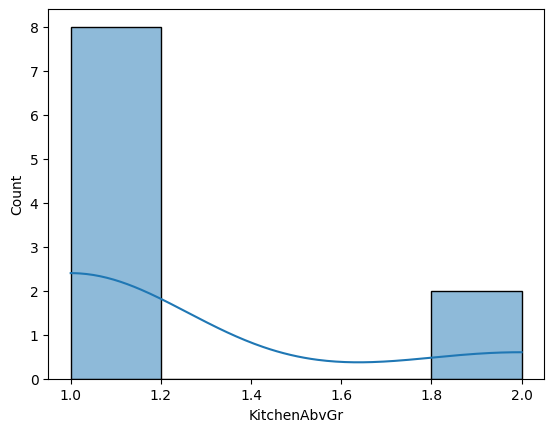

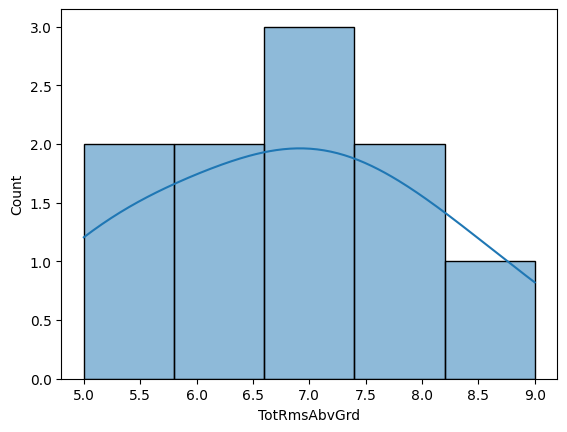

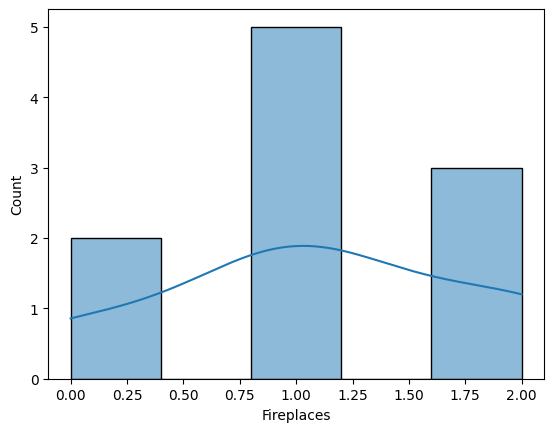

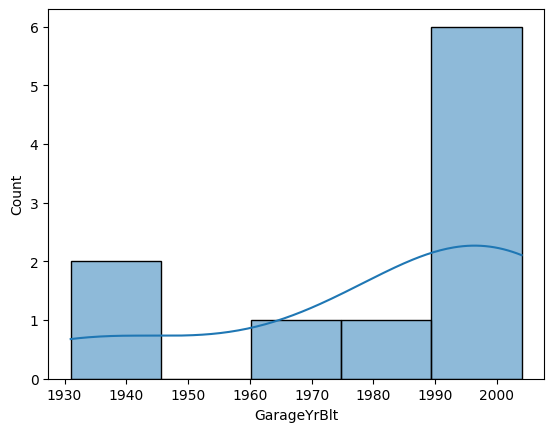

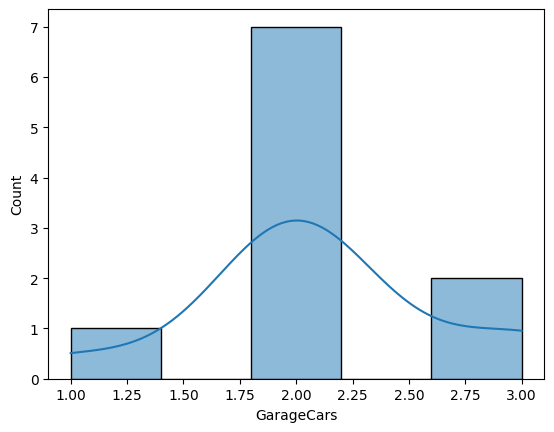

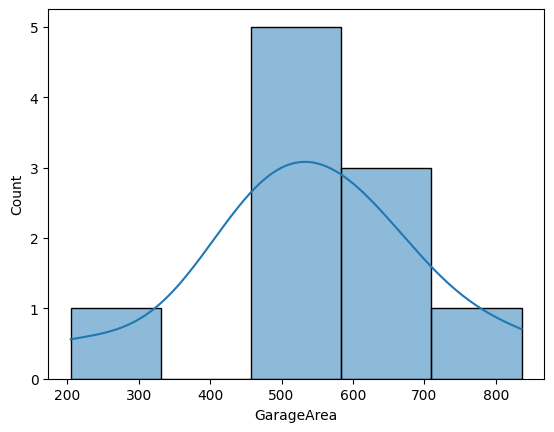

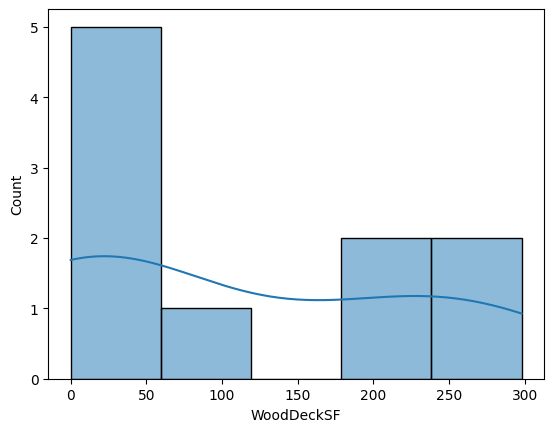

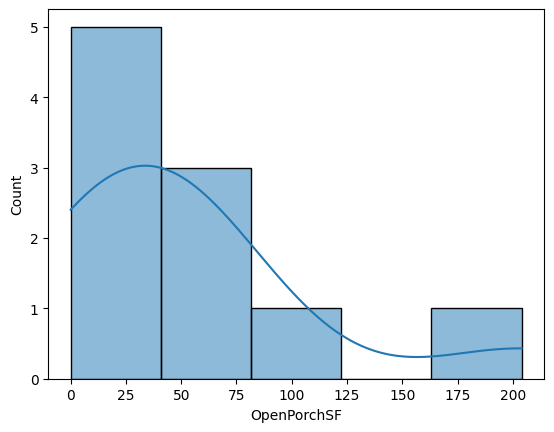

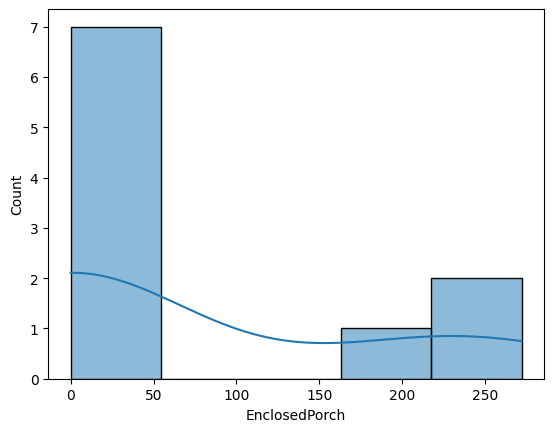

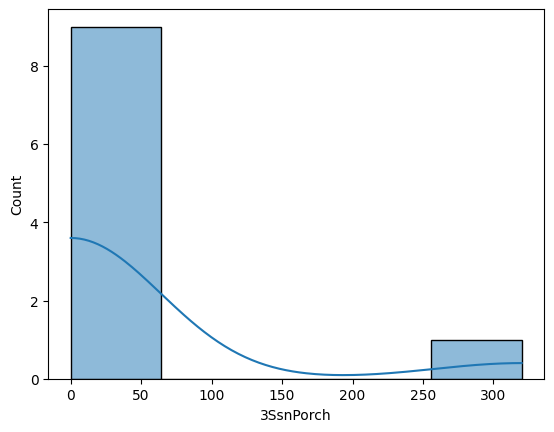

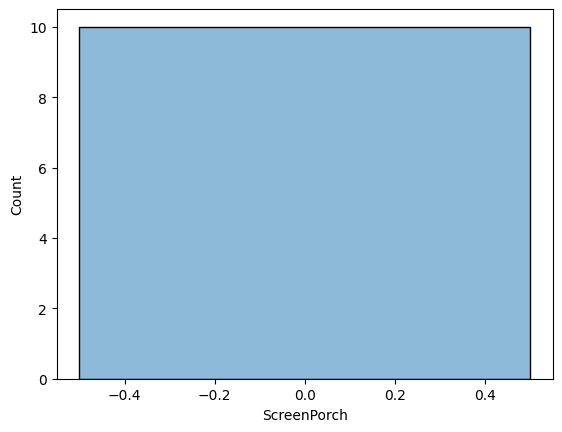

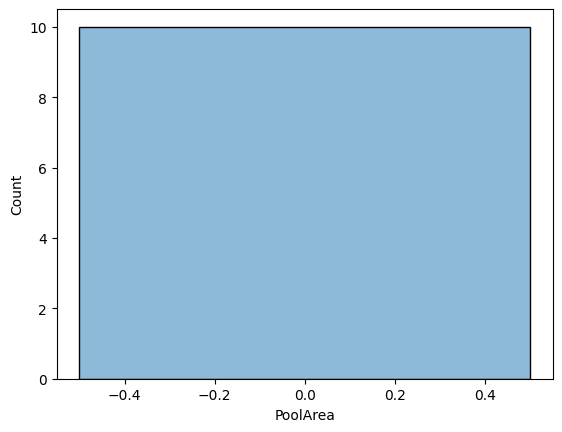

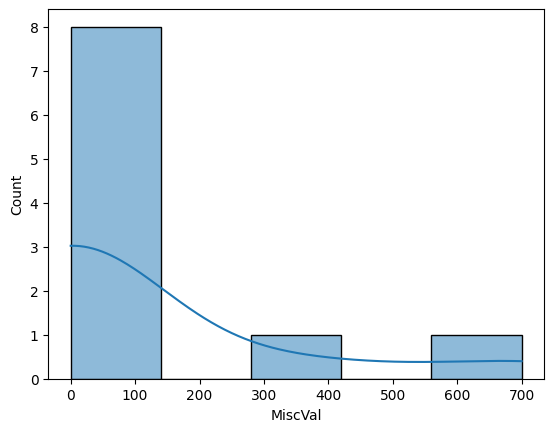

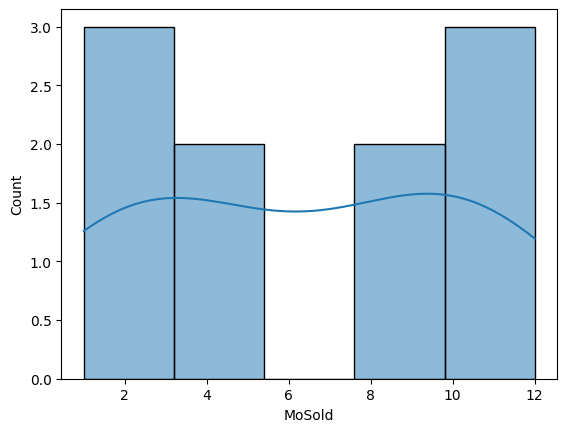

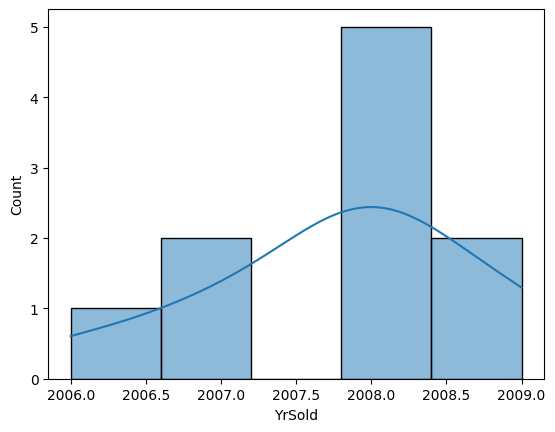

In [75]:
for i in con:
  sns.histplot(data=df.head(10),x=str(i),kde=True)
  plt.show()

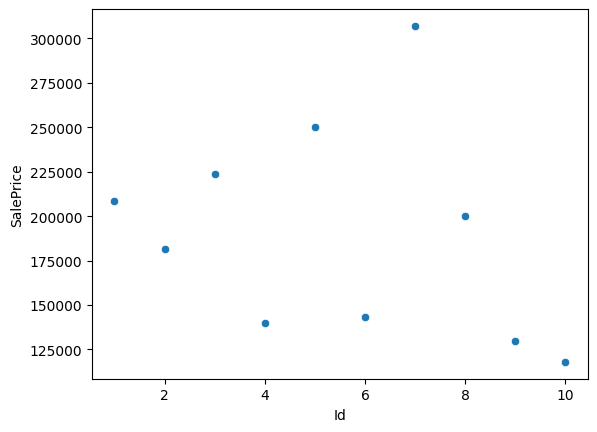

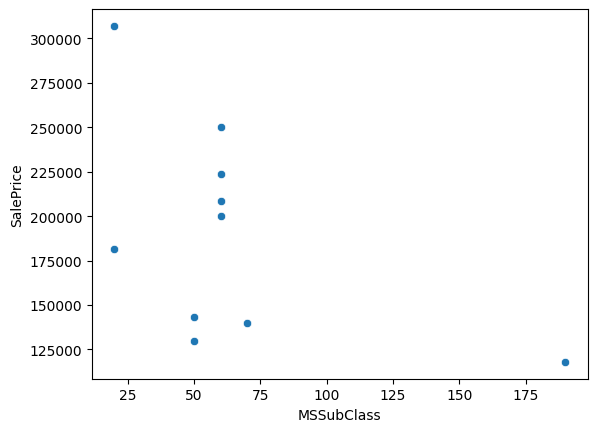

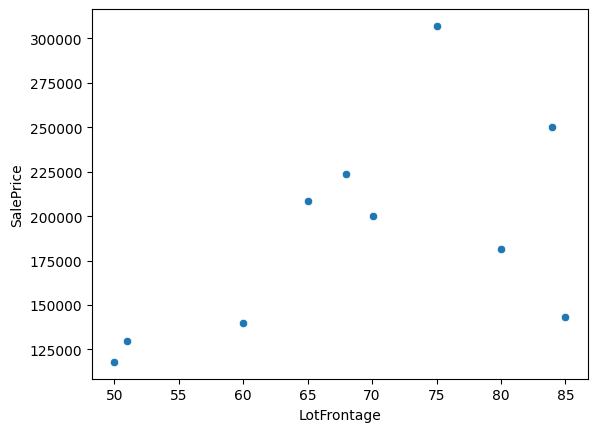

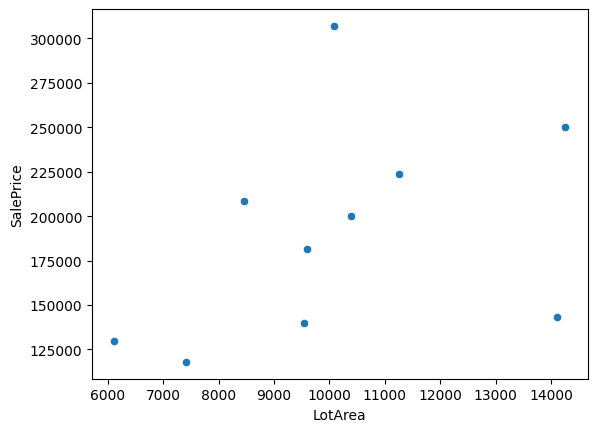

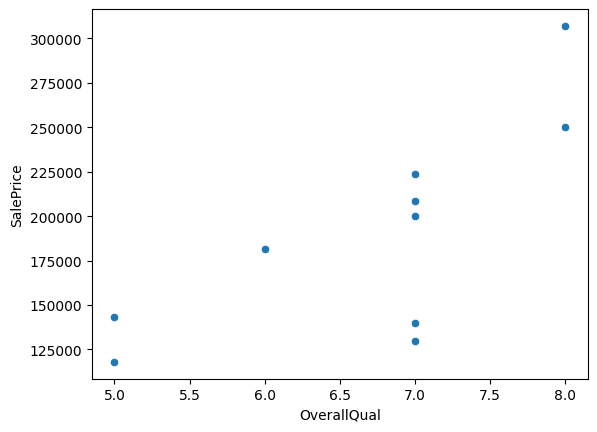

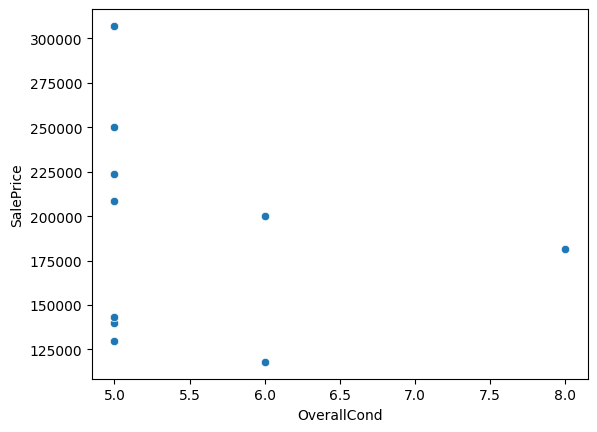

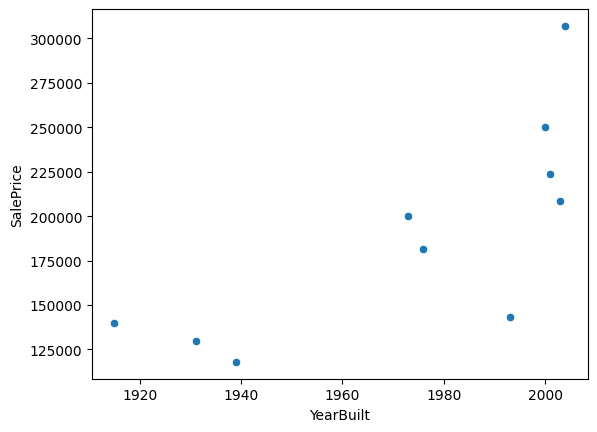

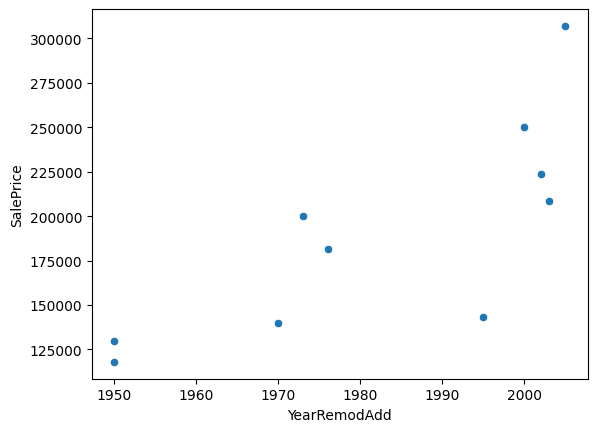

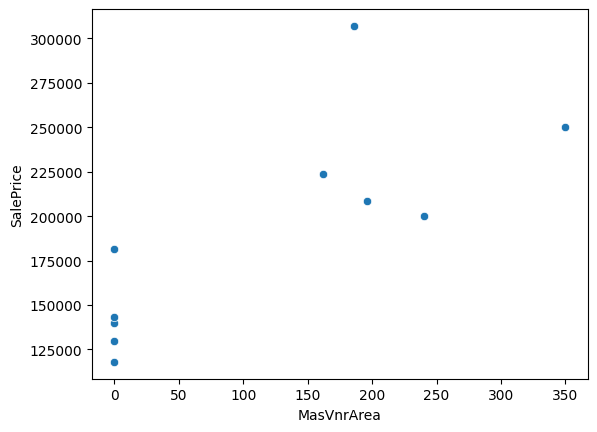

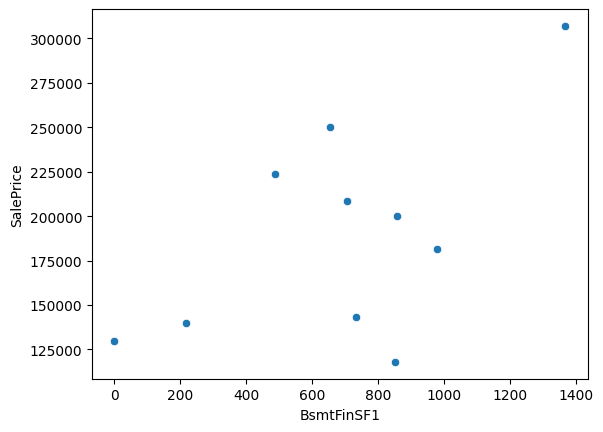

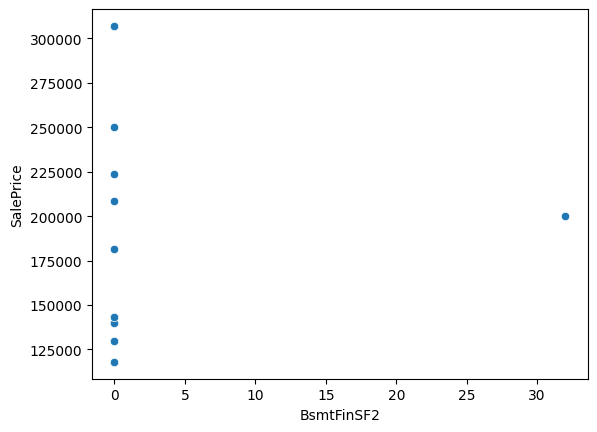

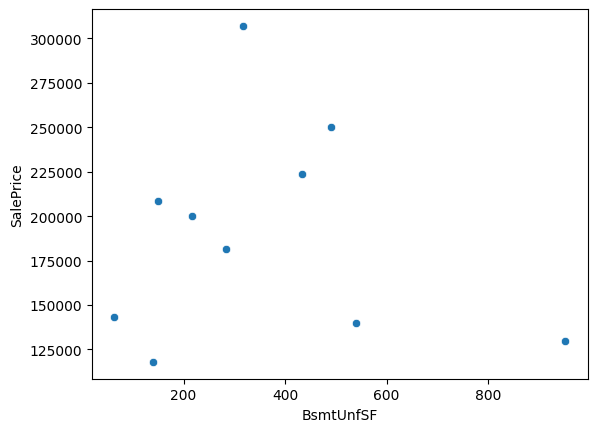

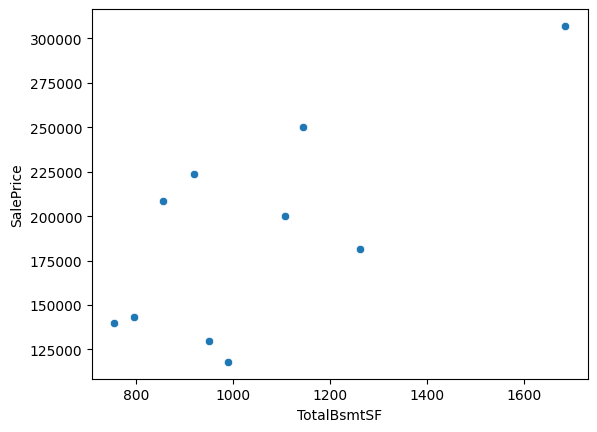

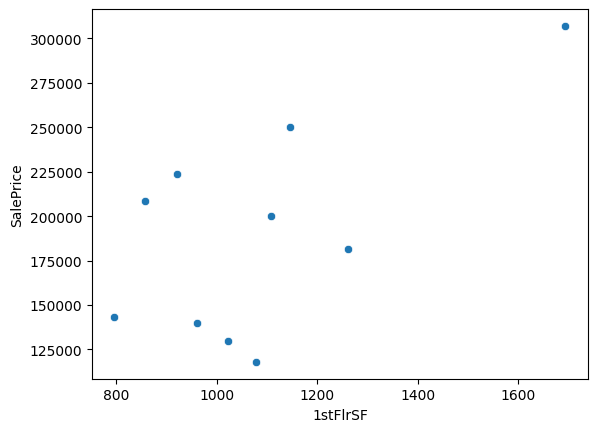

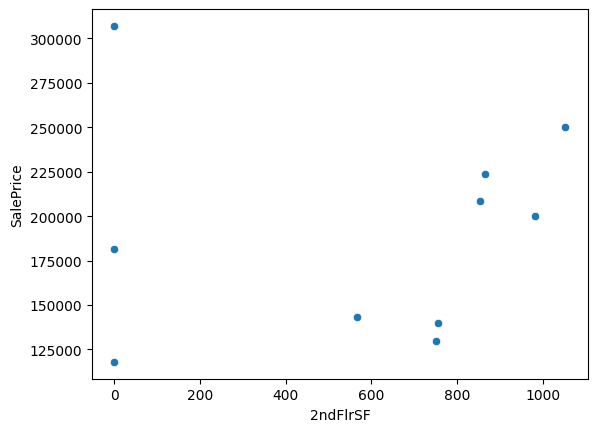

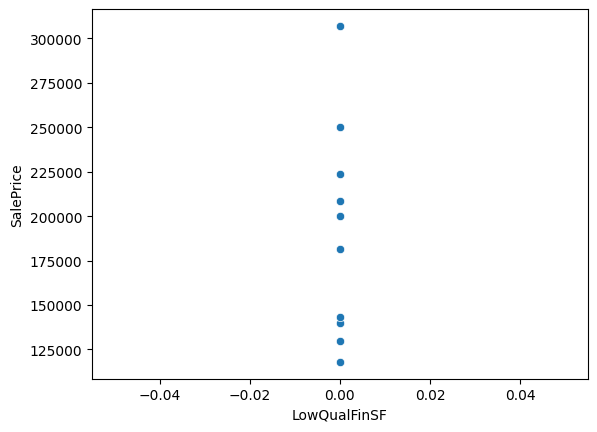

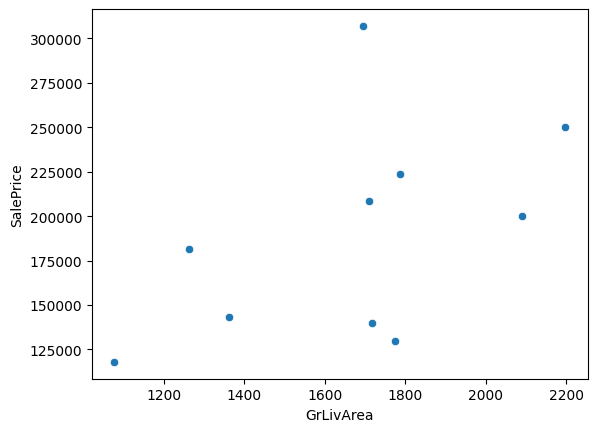

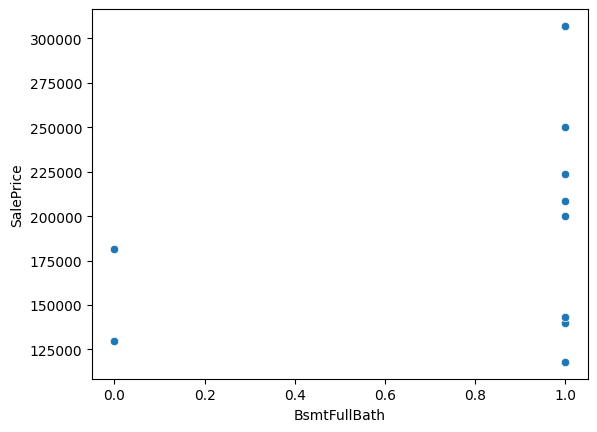

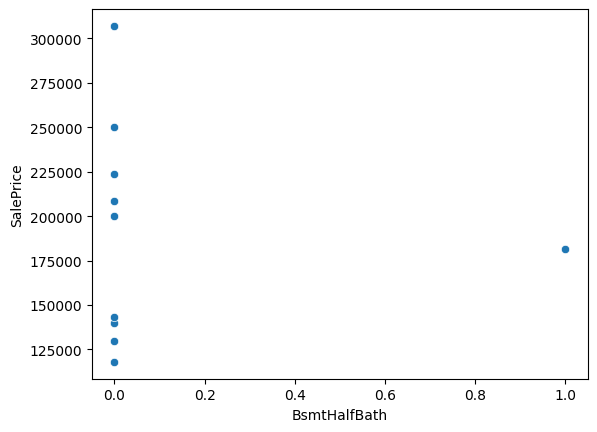

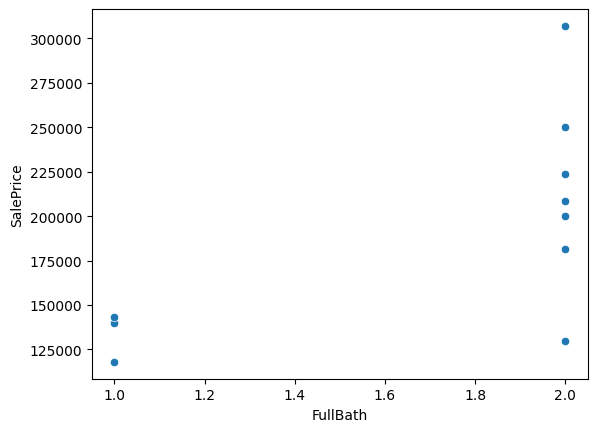

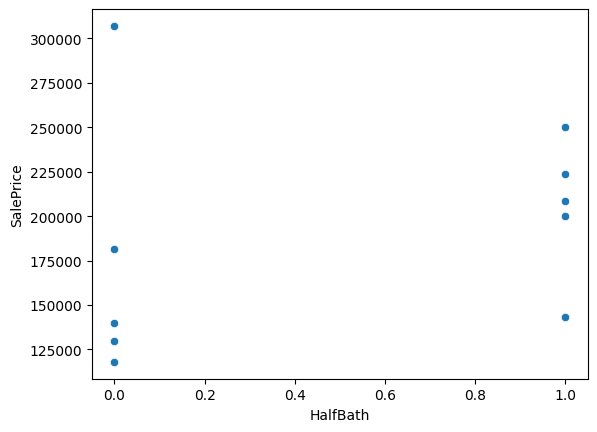

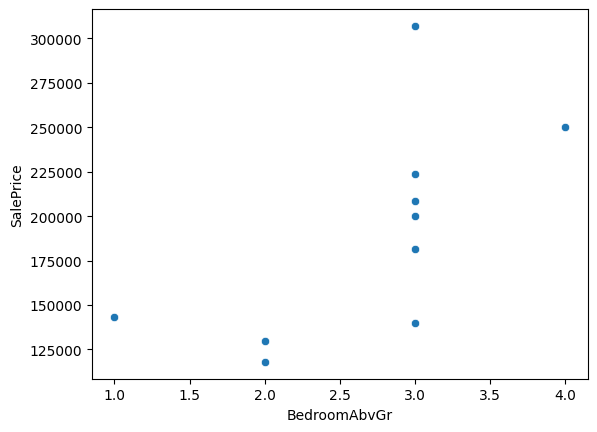

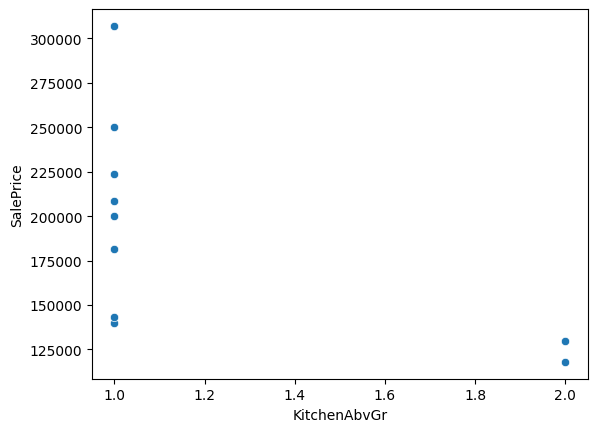

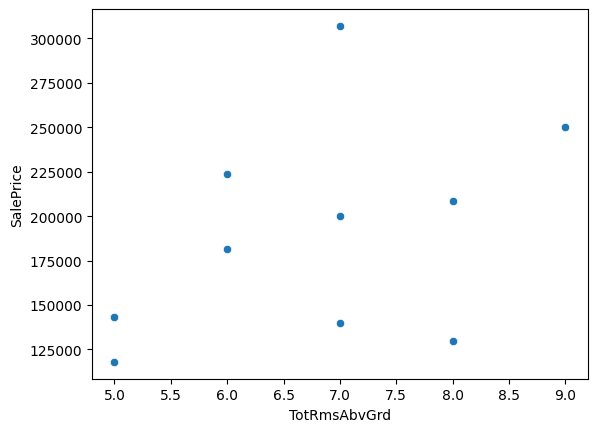

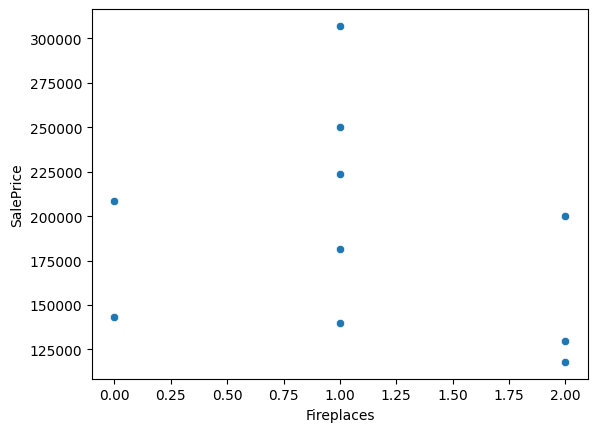

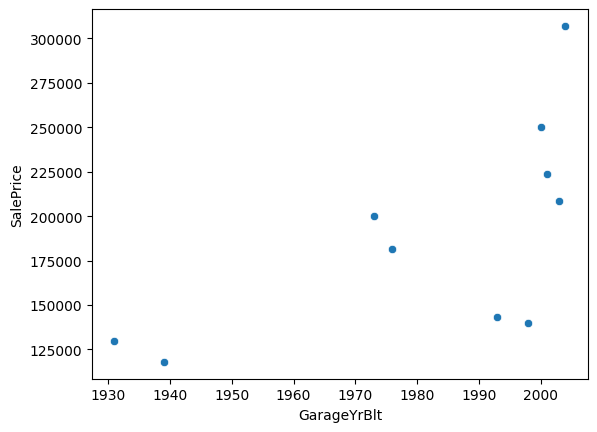

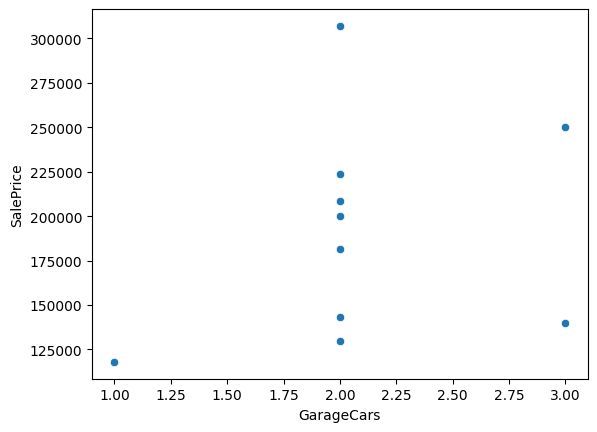

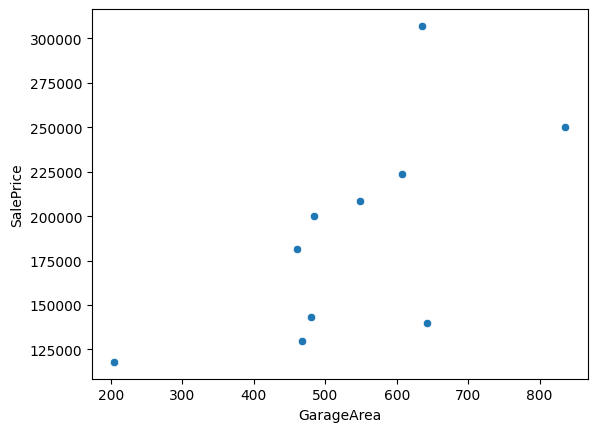

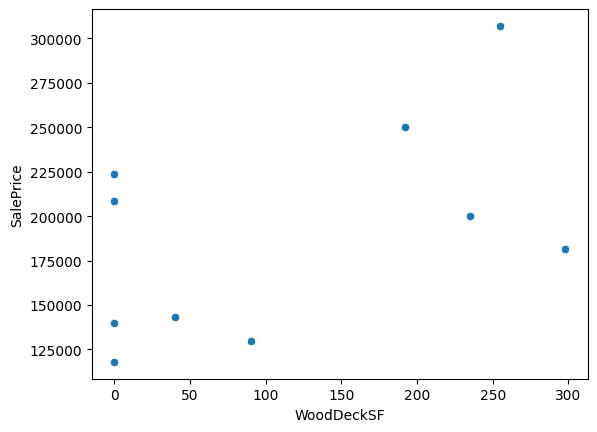

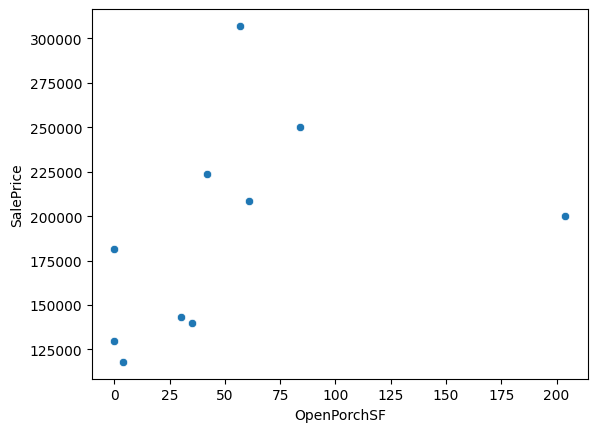

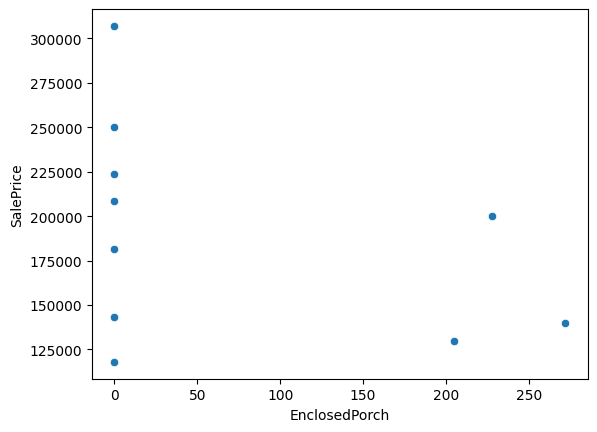

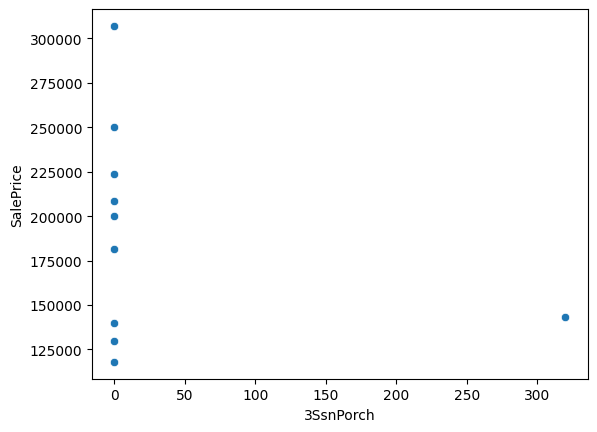

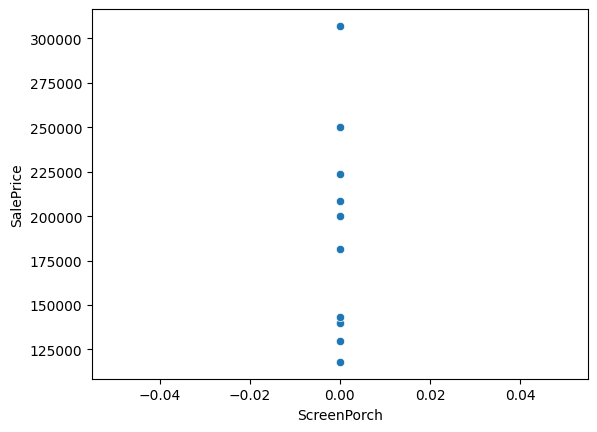

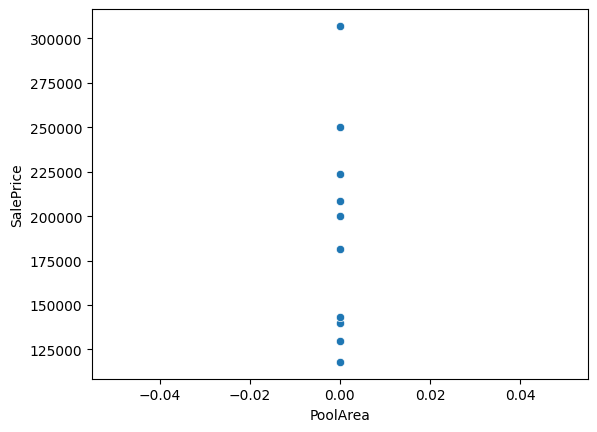

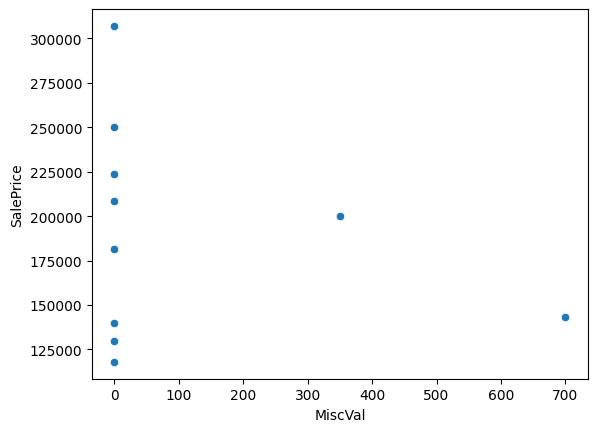

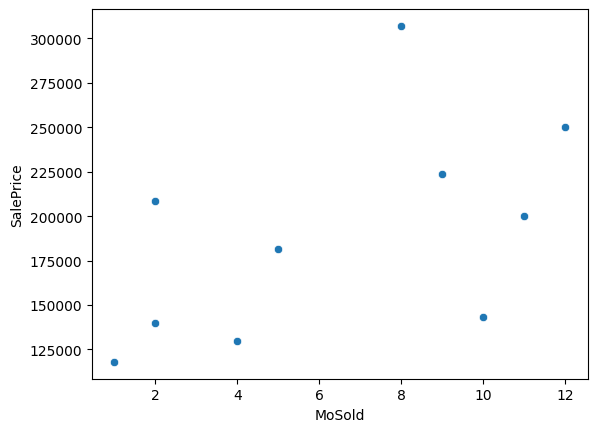

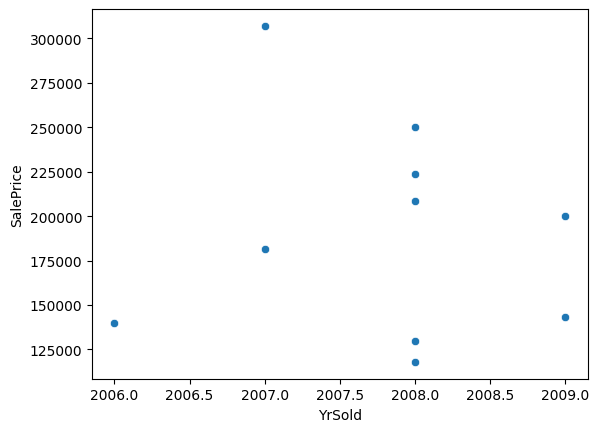

In [76]:
for i in con:
  sns.scatterplot(data=df.head(10),x=str(i),y='SalePrice')
  plt.show()

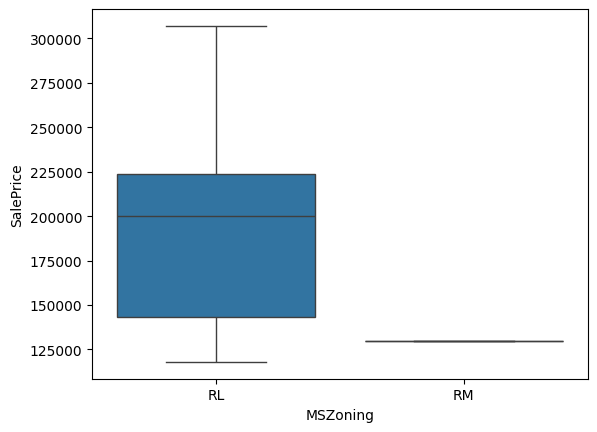

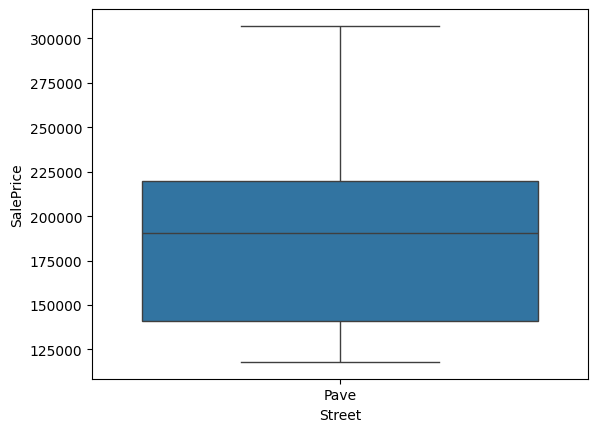

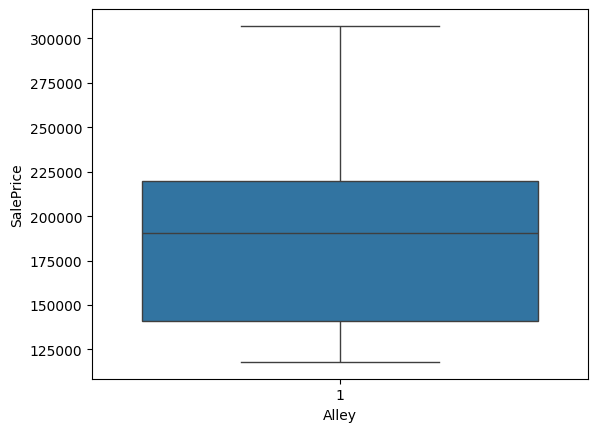

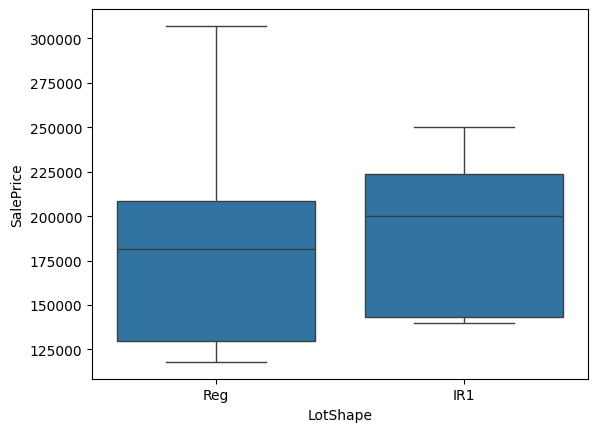

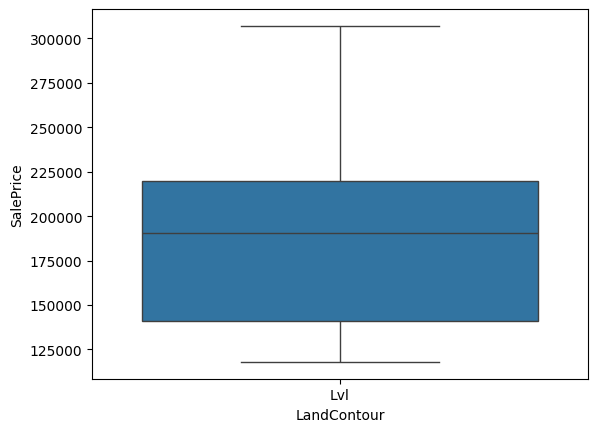

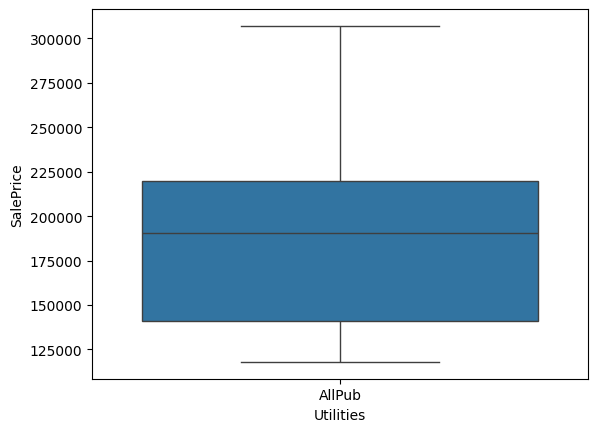

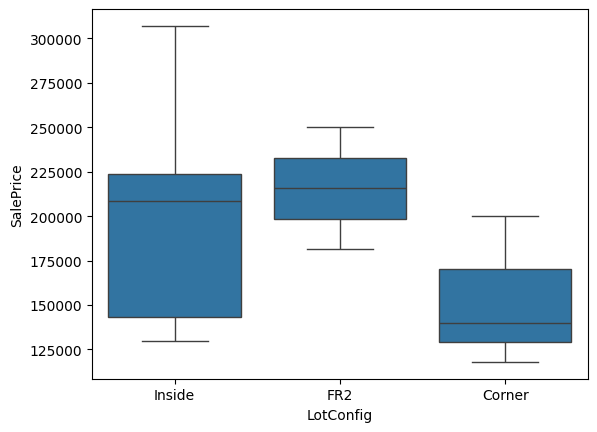

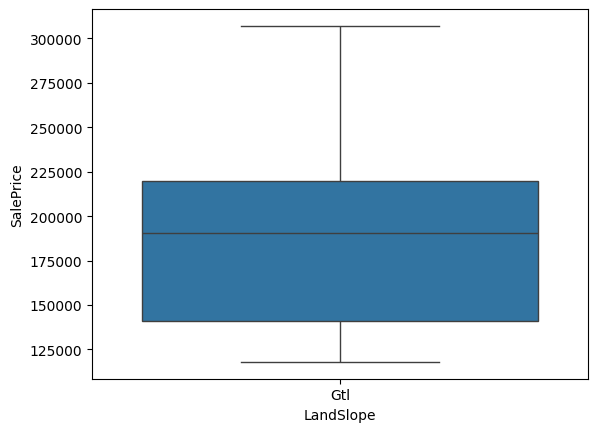

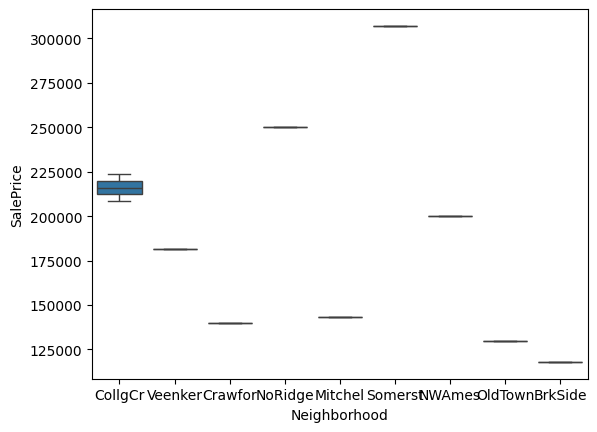

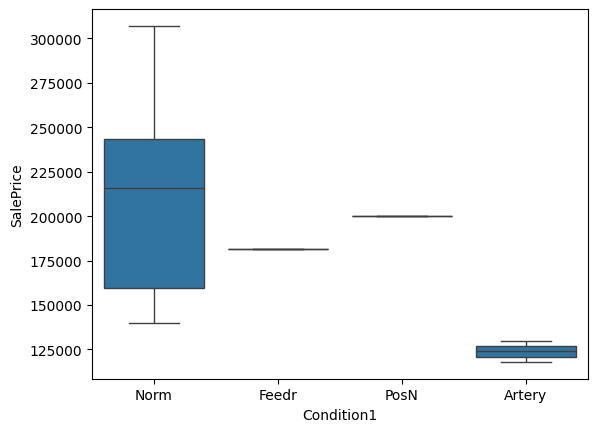

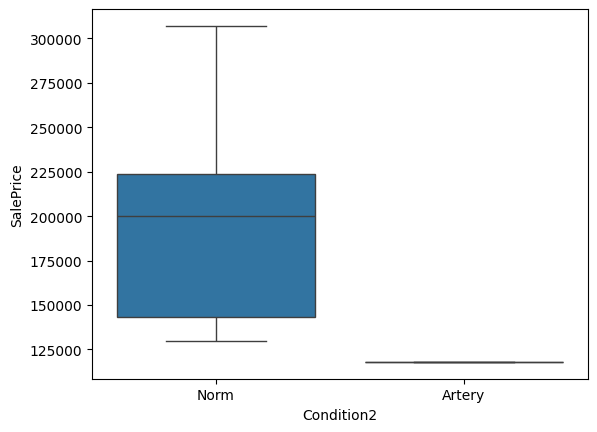

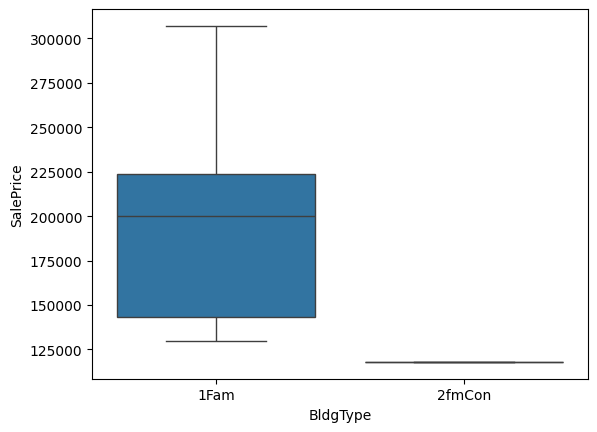

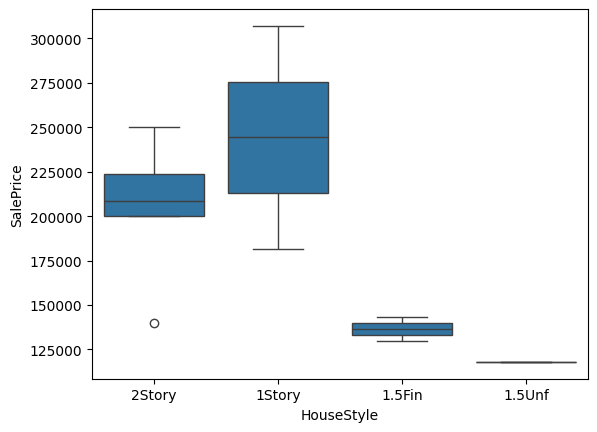

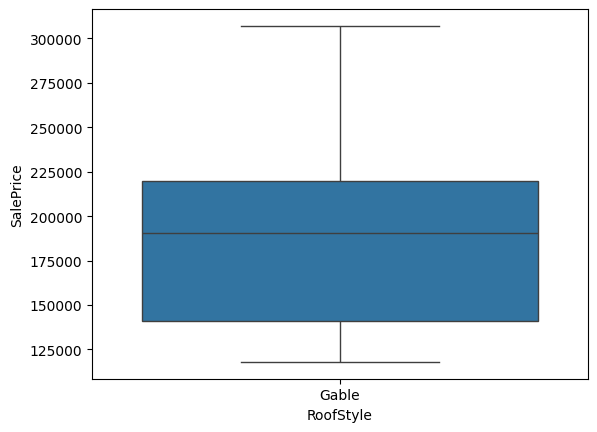

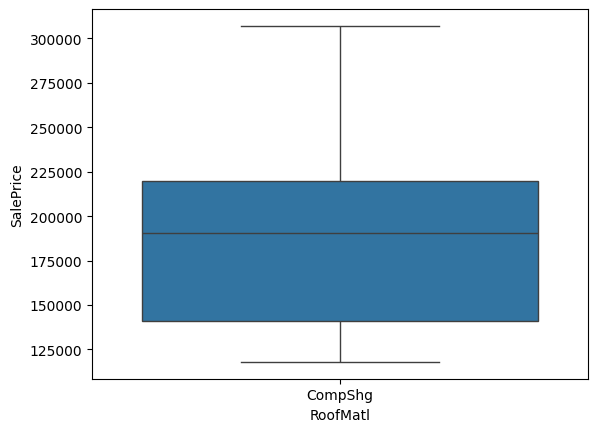

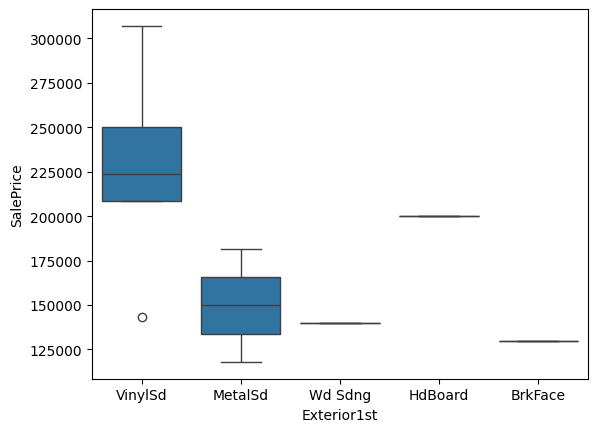

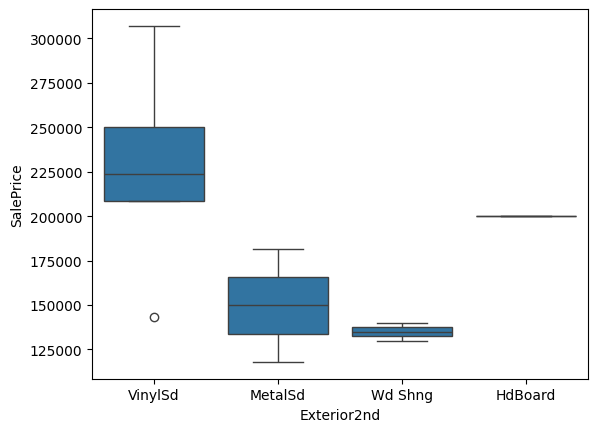

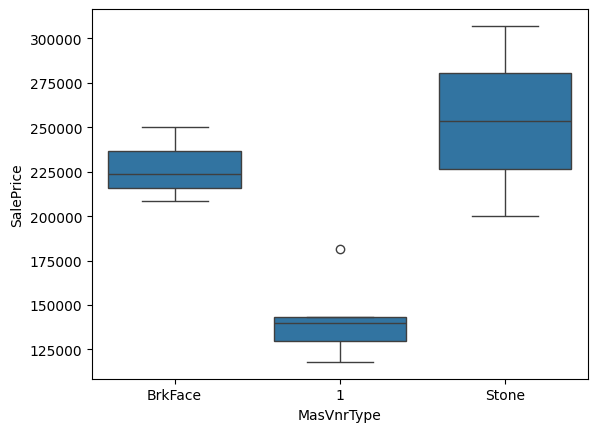

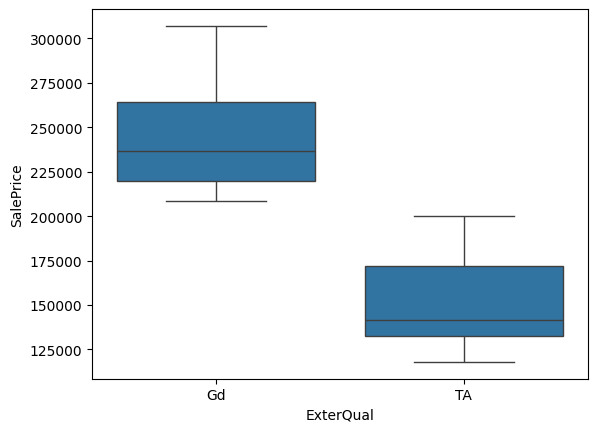

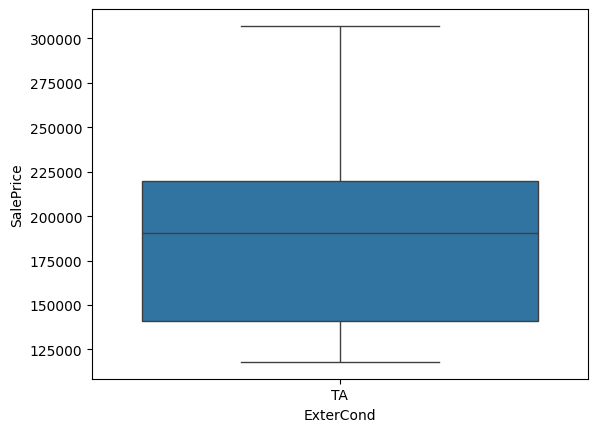

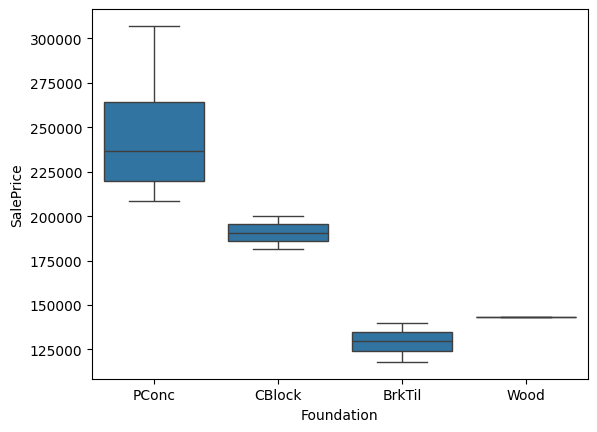

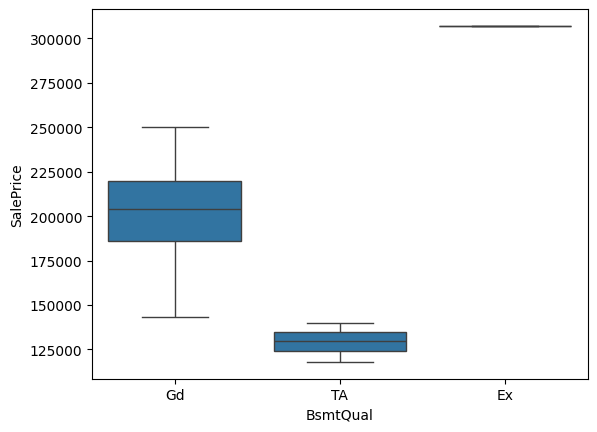

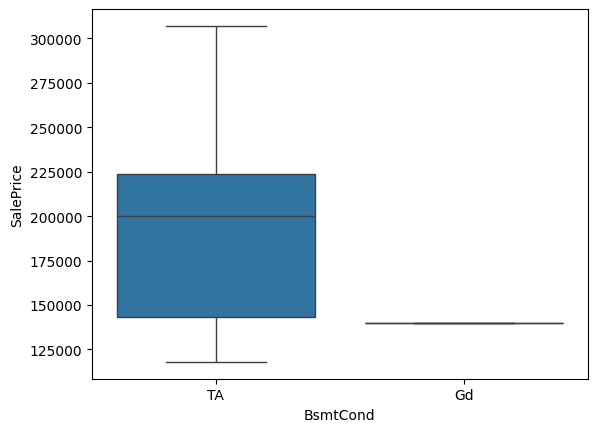

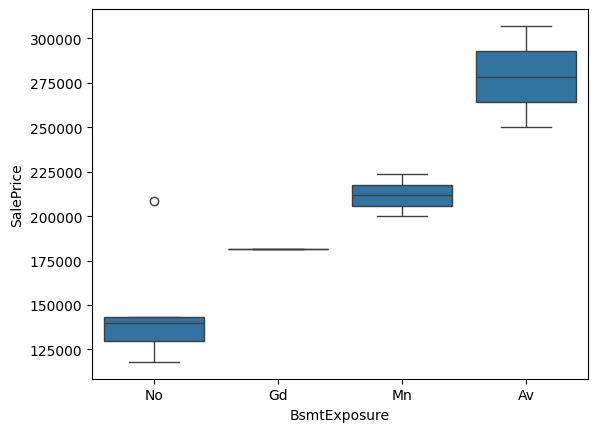

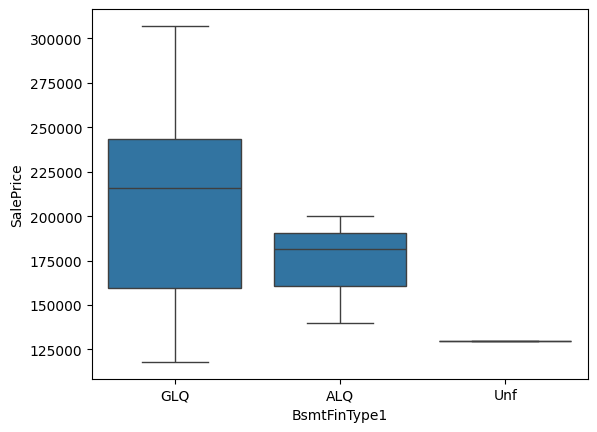

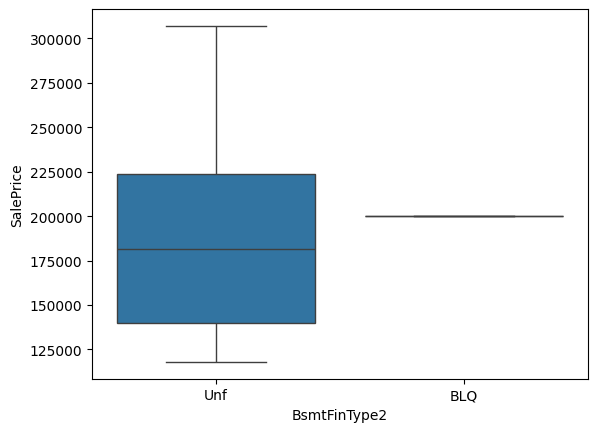

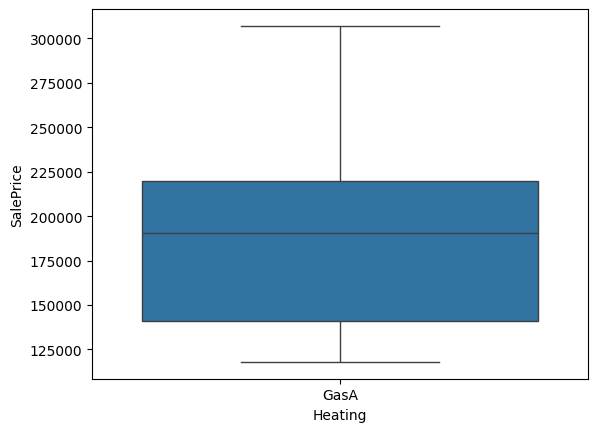

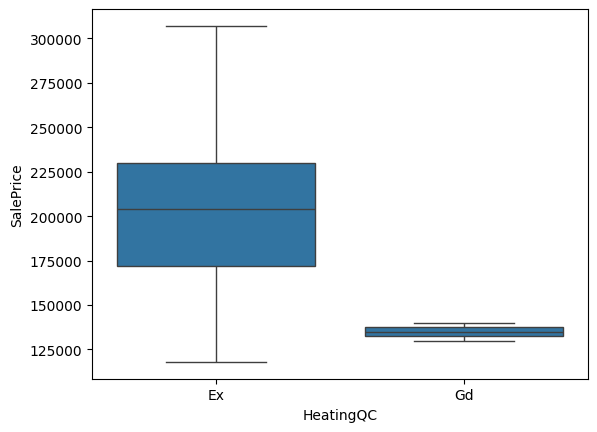

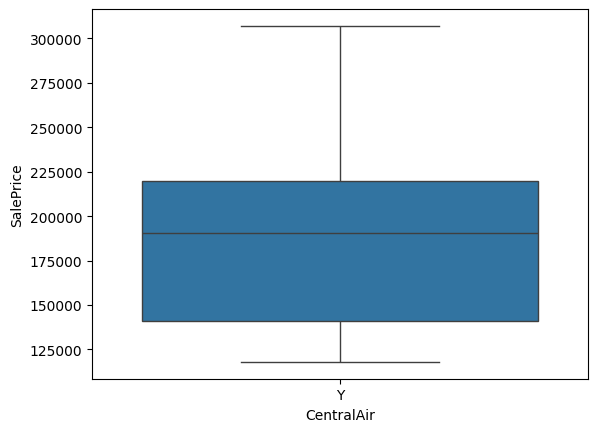

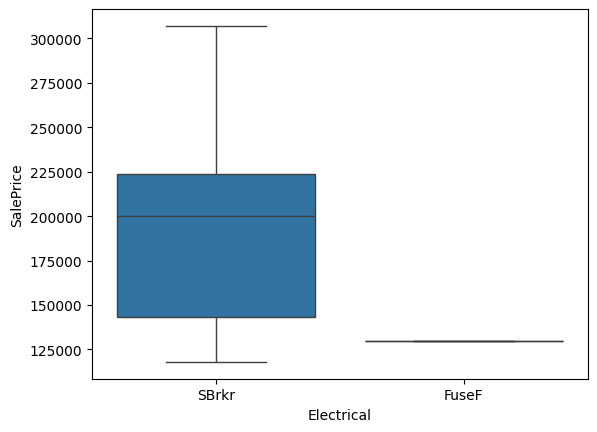

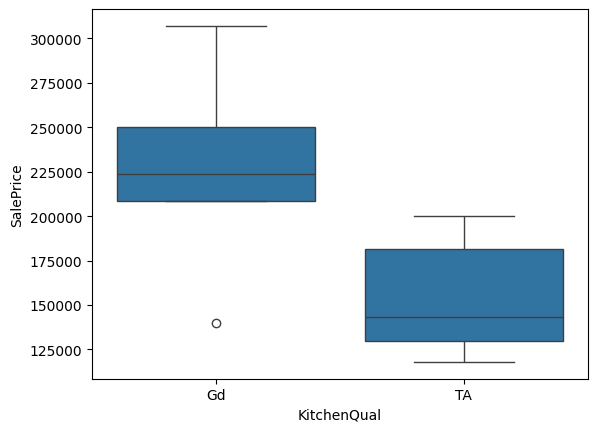

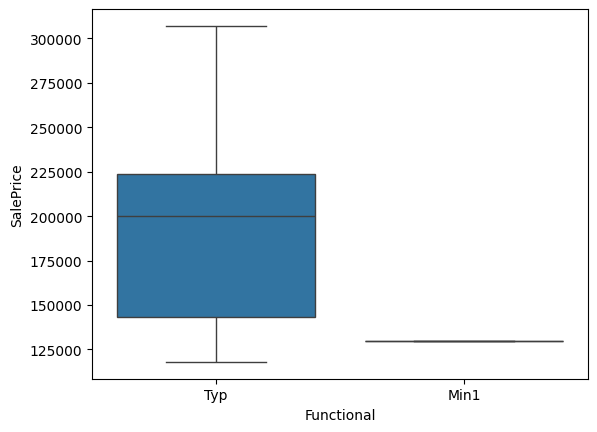

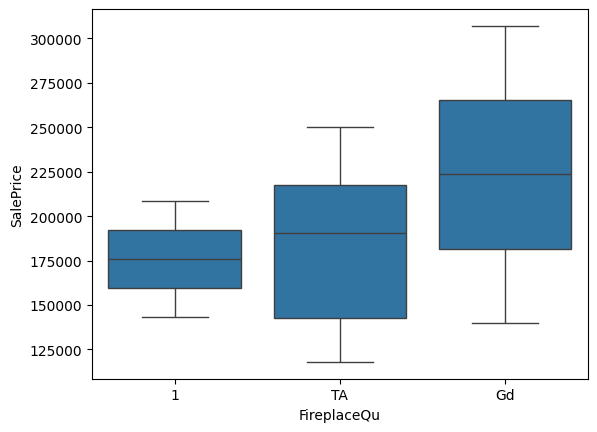

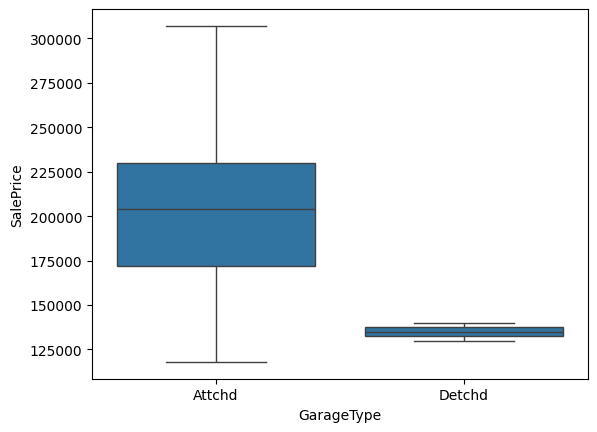

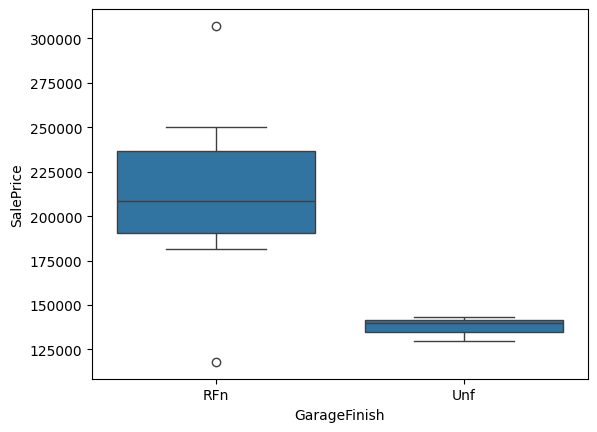

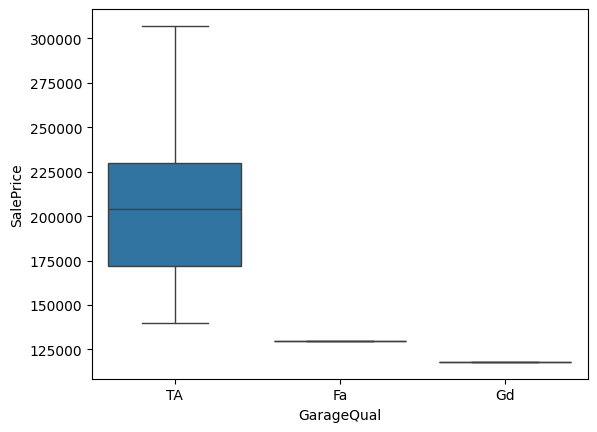

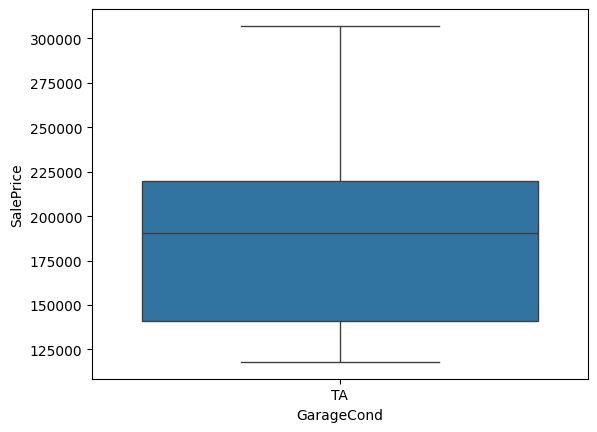

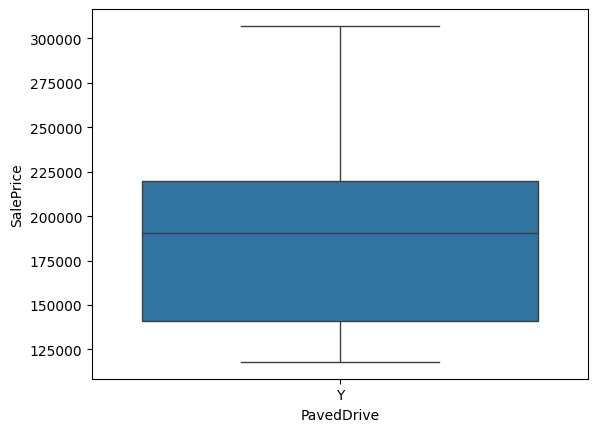

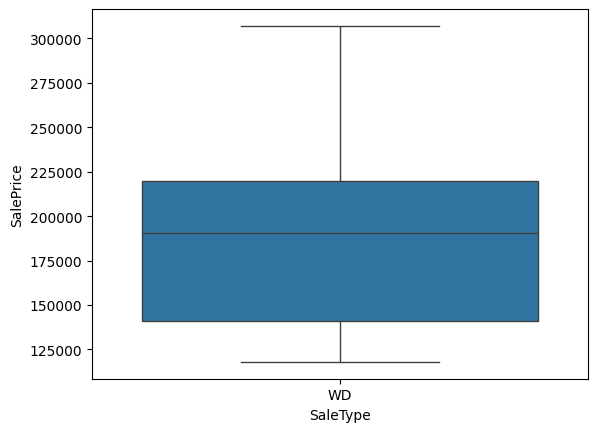

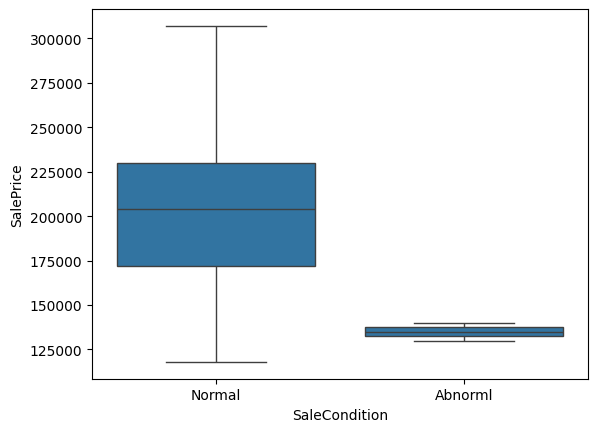

In [77]:
for i in cat:
  sns.boxplot(data=df.head(10),x=str(i),y='SalePrice')
  plt.show()

In [78]:
 #Train test split
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [79]:
# Selecting the best model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [80]:
from sklearn.metrics import r2_score
lr=LinearRegression()
dtr=DecisionTreeRegressor(max_depth=3)
rfr=RandomForestRegressor(n_estimators=10,random_state=42)
svr=SVR(kernel='linear')
knr=KNeighborsRegressor(n_neighbors=4)

In [81]:
d=[lr,dtr,rfr,svr,knr]
for i in d:
  model=i.fit(Xtrain,Ytrain)
  tr_pred=model.predict(Xtrain)
  ts_pred=model.predict(Xtest)
  tr_score=r2_score(tr_pred,Ytrain)
  ts_score=r2_score(ts_pred,Ytest)
  print('algorithm:',i)
  print('training score is:',tr_score)
  print('testing score is:',ts_score)
  print('***')

algorithm: LinearRegression()
training score is: 0.9011330763284892
testing score is: 0.8904984441677283
***
algorithm: DecisionTreeRegressor(max_depth=3)
training score is: 0.6946383820623399
testing score is: 0.6129856650661066
***
algorithm: RandomForestRegressor(n_estimators=10, random_state=42)
training score is: 0.9664495220626929
testing score is: 0.8429764228040075
***
algorithm: SVR(kernel='linear')
training score is: -136.17623454714027
testing score is: -118.38595425519512
***
algorithm: KNeighborsRegressor(n_neighbors=4)
training score is: 0.8618963183661293
testing score is: 0.8360117526801338
***


In [82]:
#Checking AdaBoostRegressor with other models.
d1=[lr,rfr,dtr,knr]
for i in d1:
    adb=AdaBoostRegressor(i,n_estimators=8)
    model=adb.fit(Xtrain,Ytrain)
    tr_pred=model.predict(Xtrain)
    ts_pred=model.predict(Xtest)
    tr_score=r2_score(tr_pred,Ytrain)
    ts_score=r2_score(ts_pred,Ytest)
    print('algorithm:',i)
    print('training score is:',tr_score)
    print('testing score is:',ts_score)
    print('***')

algorithm: LinearRegression()
training score is: 0.8965784768419912
testing score is: 0.8658319936875157
***
algorithm: RandomForestRegressor(n_estimators=10, random_state=42)
training score is: 0.9878095591034086
testing score is: 0.8678070739264655
***
algorithm: DecisionTreeRegressor(max_depth=3)
training score is: 0.7774078196662657
testing score is: 0.7434083415736522
***
algorithm: KNeighborsRegressor(n_neighbors=4)
training score is: 0.9241731802046868
testing score is: 0.8659839890639
***


In [83]:
# Regularization
model=lr.fit(xtrain,ytrain)

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
from sklearn.linear_model import Ridge
rr=Ridge()

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error,r2_score

In [87]:
#  Regularization using loop
w=[]
e=0.01
for i in range(0,100,1):
    w.append(e)
    e=round(e+0.01,4)# i will be values from w

In [88]:
rr=Ridge()
hp={'alpha':w,'random_state':np.arange(1,40)}# hyper parameters
cv = GridSearchCV(rr,hp,cv=4)
cvmodel=cv.fit(X,Y)

In [89]:
cv.best_params_

{'alpha': 1.0, 'random_state': np.int64(1)}

In [90]:
rr=Ridge(alpha=1.0 ,random_state=1)

In [91]:
model = rr.fit(Xtrain,Ytrain)
# now predictions
tr_pred = model.predict(Xtrain)
ts_pred =model.predict(Xtest)
# now check metrics by comparing predictions with actuals
tr_score = r2_score(Ytrain,tr_pred)
ts_score = r2_score(Ytest,ts_pred)
tr_mean=mean_absolute_error(Ytrain,tr_pred)
ts_mean=mean_absolute_error(Ytest,ts_pred)
tr_rmse=np.sqrt(mean_squared_error(Ytrain,tr_pred))
ts_rmse=np.sqrt(mean_squared_error(Ytest,ts_pred))
tr_mse=mean_squared_error(Ytrain,tr_pred)
ts_mse=mean_squared_error(Ytest,ts_pred)

In [92]:
print('Training score is:',tr_score)
print('Testing score is:',ts_score)
print('***')
print('Mean_Absolute_Error in training is: ',tr_mean)
print('Mean_Absolute_Error in testing is: ',ts_mean)
print('***')
print('Root_Mean_Squared_Error in training is: ',tr_rmse)
print('Root_Mean_Squared_Error in testing is: ',ts_rmse)
print('***')
print('Mean_Squared_Error in training is: ',tr_mse)
print('Mean_Squared_Error in testing is: ',ts_mse)
print('***')

Training score is: 0.9096735342554241
Testing score is: 0.8917447748501461
***
Mean_Absolute_Error in training is:  14682.253378530102
Mean_Absolute_Error in testing is:  14540.56107349031
***
Root_Mean_Squared_Error in training is:  20481.64473136297
Root_Mean_Squared_Error in testing is:  20602.34570075687
***
Mean_Squared_Error in training is:  419497770.9017685
Mean_Squared_Error in testing is:  424456648.373495
***


In [93]:
# Predictions with testing data
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'Street', 'Utilities', 'LandSlope', 'Neighborhood',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [94]:
# Import testing data
df1=pd.read_csv("/content/testing_set.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [95]:
# Null Value Treatment
for i in df1.columns:
  if df1[i].dtype==object:
    df1[i]=df1[i].fillna(df1[i].mode()[0])
  else:
    df1[i]=df1[i].fillna(df1[i].mean())

<Axes: >

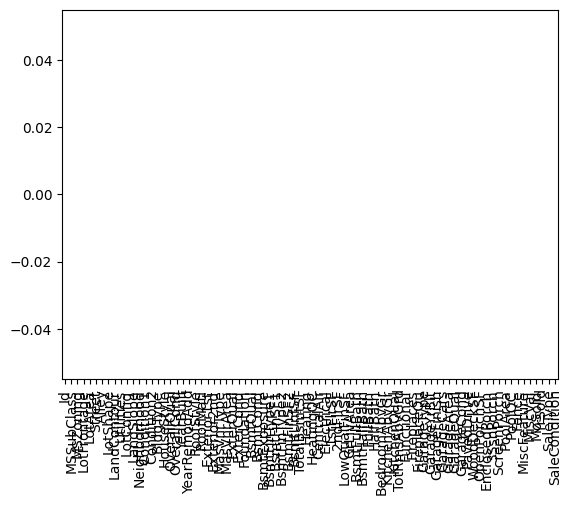

In [96]:
df1.isnull().sum().plot(kind='bar')

In [97]:
# Make a new columns list with the columns present in both X and df1
column=[]
for i in df1.columns:
  if i in X.columns:
    column.append(i)

In [98]:
X1=df1[column]
X1

,MSSubClass,LotArea,Street,Utilities,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,ExterQual,...,Fireplaces,FireplaceQu,GarageYrBlt,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,PoolArea,SaleType,SaleCondition
0,20,11622,Pave,AllPub,Gtl,NAmes,5,6,1961,TA,...,0,Gd,1961.000000,730.0,TA,140,0,0,WD,Normal
1,20,14267,Pave,AllPub,Gtl,NAmes,6,6,1958,TA,...,0,Gd,1958.000000,312.0,TA,393,36,0,WD,Normal
2,60,13830,Pave,AllPub,Gtl,Gilbert,5,5,1997,TA,...,1,TA,1997.000000,482.0,TA,212,34,0,WD,Normal
3,60,9978,Pave,AllPub,Gtl,Gilbert,6,6,1998,TA,...,1,Gd,1998.000000,470.0,TA,360,36,0,WD,Normal
4,120,5005,Pave,AllPub,Gtl,StoneBr,8,5,1992,Gd,...,0,Gd,1992.000000,506.0,TA,0,82,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,Pave,AllPub,Gtl,MeadowV,4,7,1970,TA,...,0,Gd,1977.721217,0.0,TA,0,0,0,WD,Normal
1455,160,1894,Pave,AllPub,Gtl,MeadowV,4,5,1970,TA,...,0,Gd,1970.000000,286.0,TA,0,24,0,WD,Abnorml
1456,20,20000,Pave,AllPub,Gtl,Mitchel,5,7,1960,TA,...,1,TA,1960.000000,576.0,TA,474,0,0,WD,Abnorml
1457,85,10441,Pave,AllPub,Gtl,Mitchel,5,5,1992,TA,...,0,Gd,1977.721217,0.0,TA,80,32,0,WD,Normal


In [99]:
# Preprocessing the data
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss= StandardScaler()

In [100]:
# Separate cat and con from X1
cat=[]
con=[]
for i in X1.columns:
  if X1[i].dtype==object:
    cat.append(i)
  else:
    con.append(i)

In [101]:
X1cat=X1[cat]
X1con=X1[con]

In [102]:
# Label Encoding
for i in X1cat.columns:
  X1cat[i]=le.fit_transform(X1cat[i])

In [103]:
# Standard Scaling
Xcon=pd.DataFrame(ss.fit_transform(X1con),columns=con)

In [104]:
# Merge cat and con in X1
X1=X1con.join(X1cat)
X1

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BsmtQual,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,SaleType,SaleCondition
0,20,11622,5,6,1961,468.0,144.0,882.0,896,0,...,3,3,3,4,3,6,2,3,8,4
1,20,14267,6,6,1958,923.0,0.0,1329.0,1329,0,...,3,3,5,4,2,6,2,3,8,4
2,60,13830,5,5,1997,791.0,0.0,928.0,928,701,...,2,3,5,2,3,6,4,3,8,4
3,60,9978,6,6,1998,602.0,0.0,926.0,926,678,...,3,3,5,0,2,6,2,3,8,4
4,120,5005,8,5,1992,263.0,0.0,1280.0,1280,0,...,2,3,5,0,2,6,2,3,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,0.0,0.0,546.0,546,546,...,3,3,5,2,3,6,2,3,8,4
1455,160,1894,4,5,1970,252.0,0.0,546.0,546,546,...,3,3,5,4,3,6,2,3,8,0
1456,20,20000,5,7,1960,1224.0,0.0,1224.0,1224,0,...,3,3,5,0,3,6,4,3,8,0
1457,85,10441,5,5,1992,337.0,0.0,912.0,970,0,...,2,0,5,4,3,6,2,3,8,4


In [105]:
# Reset the index
X1.index=range(1461,1461+X1.shape[0])

In [106]:
# Predictions of sale price
X1['SalePrice']= model.predict(X1)
X1

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,SaleType,SaleCondition,SalePrice
1461,20,11622,5,6,1961,468.0,144.0,882.0,896,0,...,3,3,4,3,6,2,3,8,4,1.316535e+08
1462,20,14267,6,6,1958,923.0,0.0,1329.0,1329,0,...,3,5,4,2,6,2,3,8,4,1.652076e+08
1463,60,13830,5,5,1997,791.0,0.0,928.0,928,701,...,3,5,2,3,6,4,3,8,4,1.662817e+08
1464,60,9978,6,6,1998,602.0,0.0,926.0,926,678,...,3,5,0,2,6,2,3,8,4,1.373454e+08
1465,120,5005,8,5,1992,263.0,0.0,1280.0,1280,0,...,3,5,0,2,6,2,3,8,4,9.336438e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,4,7,1970,0.0,0.0,546.0,546,546,...,3,5,2,3,6,2,3,8,4,5.662882e+07
2916,160,1894,4,5,1970,252.0,0.0,546.0,546,546,...,3,5,4,3,6,2,3,8,0,6.039633e+07
2917,20,20000,5,7,1960,1224.0,0.0,1224.0,1224,0,...,3,5,0,3,6,4,3,8,0,2.064449e+08
2918,85,10441,5,5,1992,337.0,0.0,912.0,970,0,...,0,5,4,3,6,2,3,8,4,1.188026e+08


In [107]:
X1.insert(loc=0,column='Id',value=X1.index)

In [108]:
X1

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,SaleType,SaleCondition,SalePrice
1461,1461,20,11622,5,6,1961,468.0,144.0,882.0,896,...,3,3,4,3,6,2,3,8,4,1.316535e+08
1462,1462,20,14267,6,6,1958,923.0,0.0,1329.0,1329,...,3,5,4,2,6,2,3,8,4,1.652076e+08
1463,1463,60,13830,5,5,1997,791.0,0.0,928.0,928,...,3,5,2,3,6,4,3,8,4,1.662817e+08
1464,1464,60,9978,6,6,1998,602.0,0.0,926.0,926,...,3,5,0,2,6,2,3,8,4,1.373454e+08
1465,1465,120,5005,8,5,1992,263.0,0.0,1280.0,1280,...,3,5,0,2,6,2,3,8,4,9.336438e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2915,160,1936,4,7,1970,0.0,0.0,546.0,546,...,3,5,2,3,6,2,3,8,4,5.662882e+07
2916,2916,160,1894,4,5,1970,252.0,0.0,546.0,546,...,3,5,4,3,6,2,3,8,0,6.039633e+07
2917,2917,20,20000,5,7,1960,1224.0,0.0,1224.0,1224,...,3,5,0,3,6,4,3,8,0,2.064449e+08
2918,2918,85,10441,5,5,1992,337.0,0.0,912.0,970,...,0,5,4,3,6,2,3,8,4,1.188026e+08


In [109]:
df2=X1[['Id','SalePrice']]
df2

,Id,SalePrice
1461,1461,1.316535e+08
1462,1462,1.652076e+08
1463,1463,1.662817e+08
1464,1464,1.373454e+08
1465,1465,9.336438e+07
...,...,...
2915,2915,5.662882e+07
2916,2916,6.039633e+07
2917,2917,2.064449e+08
2918,2918,1.188026e+08


In [110]:
# Export the dataframe
df2.to_csv('MLProject1.csv',index=False)

In [111]:
df2_verify=pd.read_csv('/content/MLProject1.csv')
df2_verify

,Id,SalePrice
0,1461,1.316535e+08
1,1462,1.652076e+08
2,1463,1.662817e+08
3,1464,1.373454e+08
4,1465,9.336438e+07
...,...,...
1454,2915,5.662882e+07
1455,2916,6.039633e+07
1456,2917,2.064449e+08
1457,2918,1.188026e+08
